<a href="https://colab.research.google.com/github/Srishti6125/NYC-Taxi/blob/main/NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**  - Srishti Singhal


# **Project Summary -**

This project focuses on predicting taxi trip duration in New York City using supervised machine learning techniques. The dataset contains detailed records of NYC taxi rides, including pickup/dropoff timestamps and locations, passenger counts, and vendor information.

Extensive data cleaning, feature engineering (e.g., calculating trip duration, extracting datetime components, distance metrics), and exploratory data analysis, was performed to uncover patterns and anomalies in the trip data. A variety of regression models were built — including Linear Regression, Lasso, and XGBoost — and their performances were compared using evaluation metrics like MAE, MSE, RMSE, and R² score.

The final model helps estimate trip duration with considerable accuracy, offering real-world business value such as:
* Improving ETA predictions for customers
* Helping drivers reduce idle time and optimize routes
* Enhancing dynamic pricing systems

Overall, this project is a full pipeline implementation — from raw data to actionable insight — showcasing a solid application of regression modeling in a real-world scenario.

# **GitHub Link -**

https://github.com/Srishti6125/NYC-Taxi

# **Problem Statement**


New York City’s taxi industry generates millions of ride records daily, but accurate trip duration prediction remains a challenge due to fluctuating traffic conditions, time of day, and other dynamic factors. Poor time estimates can lead to customer dissatisfaction, inefficient fleet management, and revenue loss.

The objective of this project is to develop a machine learning model that can accurately predict the duration of a taxi trip based on features like pickup and drop-off timestamps, geographic coordinates, passenger count, and other ride-level details. This will enable taxi operators and ride-hailing platforms to:
* Provide better ETA estimates to users,
* Improve driver dispatch efficiency, and
* Optimize operational planning.

By leveraging historical trip data and regression modeling, this project aims to turn raw transportation data into valuable, actionable predictions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [3]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [5]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Copy of NYC Taxi Data.csv')

### Dataset First View

In [6]:
# Dataset First Look

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

df.shape

(1458644, 11)

### Dataset Information

In [8]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


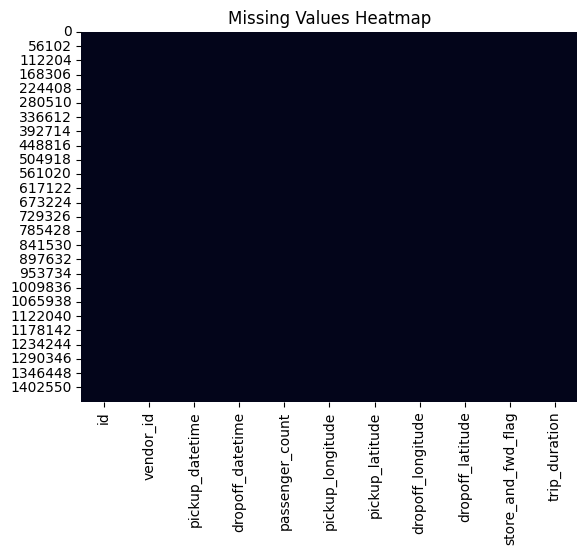

In [11]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset contains 1,458,644 rows and 11 columns, each representing a unique NYC taxi trip.

Key columns included: pickup_datetime, dropoff_datetime, passenger_count, vendor_id ,store_and_fwd_flag.

 There were mo missing values in any column.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [13]:
# Dataset Describe

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

* id - refers to the trip id
* vendor_id - specifies the vendor id (1 or 2)
* pickup_datetime - tells trip pick-up date and time
* dropoff_datetime - tells trip drop-off date and time
* passenger_count - specifies the number of passengers of a particualar taxi trip
* pickup_longitude - longitude of pick-up location
* pickup_latitude - latitude of pick-up location
* dropoff_longitude - longitude of drop-off location
* dropoff_latitude - latitude of drop-off location
* store_and_fwd_flag -  indicates trip was stored locally and then forward later
* trip_duration - specifies the total duration of the trip (in sec)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

df.nunique()

,0
id,1458644
vendor_id,2
pickup_datetime,1380222
dropoff_datetime,1380377
passenger_count,10
pickup_longitude,23047
pickup_latitude,45245
dropoff_longitude,33821
dropoff_latitude,62519
store_and_fwd_flag,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [16]:
# converting pickup_datetime from object to datetime format

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [17]:
# converting dropoff_datetime from object to datetime format

df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [19]:
# finding the timeline to which data belongs to

print("Timeline")
print("Start Date : ",df['pickup_datetime'].min())
print("End Date : ",df['pickup_datetime'].max())

# dataset covers the data of 6 months about NYC taxi data

Timeline
Start Date :  2016-01-01 00:00:17
End Date :  2016-06-30 23:59:39


In [20]:
# shortest and longest trip duration

print("Shortest trip duration : ",df['trip_duration'].min())
print("Longest trip duration : ",df['trip_duration'].max())

Shortest trip duration :  1
Longest trip duration :  3526282


In [21]:
# number of trips with shortest duration i.e., 1 sec

print("Count of trip with shortest duration : ",df[df['trip_duration']==df['trip_duration'].min()]['id'].count())

Count of trip with shortest duration :  33


In [22]:
# information about longest duration trip

print("Longest trip duration : ",df[df['trip_duration']==df['trip_duration'].max()])

Longest trip duration :                 id  vendor_id     pickup_datetime    dropoff_datetime  \
978383  id0053347          1 2016-02-13 22:46:52 2016-03-25 18:18:14   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
978383                1        -73.783905        40.648632         -73.978271   

        dropoff_latitude store_and_fwd_flag  trip_duration  
978383         40.750202                  N        3526282  


In [23]:
# distribution based on vendor_id

df['vendor_id'].value_counts().sort_index()

,count
vendor_id,
1,678342
2,780302


In [24]:
# distribution based on passenger_count

df['passenger_count'].value_counts().sort_index()

,count
passenger_count,
0,60
1,1033540
2,210318
3,59896
4,28404
5,78088
6,48333
7,3
8,1


In [25]:
#information of taxi trips with zero passengers

df[df['passenger_count']==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8


In [26]:
#information of taxi trips with 9(max) passengers

df[df['passenger_count']==9]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,560


In [27]:
# distribution based on store_and_fwd_flag

df['store_and_fwd_flag'].value_counts().sort_values()

,count
store_and_fwd_flag,
Y,8045
N,1450599


In [28]:
# northernmost and southernmost point covere by NYC taxis

min_lat = df[['pickup_latitude', 'dropoff_latitude']].min().min()
print(min_lat)
max_lat = df[['pickup_latitude', 'dropoff_latitude']].max().max()
print(max_lat)

32.1811408996582
51.88108444213867


In [29]:
# easternmost and westernmost point covere by NYC taxis

min_long = df[['pickup_longitude', 'dropoff_longitude']].min().min()
print(min_long)
max_long = df[['pickup_longitude', 'dropoff_longitude']].max().max()
print(max_long)

-121.93334197998048
-61.33552932739258


In [30]:
# area covered by NYC taxis acc. to this particular dataset
len = max_lat - min_lat
wid = max_long - min_long

# 1 deg lat = 111 km
# 1 deg longitude = 111.321 km

area =( len*111 ) * ( wid*111.321 )
print("Area covered by NYC taxis : ",area," km.sq.")

Area covered by NYC taxis :  14751018.489463596  km.sq.


In [31]:
# adding new column 'trip_duration_min'

df['trip_duration_min'] = (df['trip_duration'] / 60).round(2)

In [32]:
# adding new column 'same_day_dropoff'

df['same_day_dropoff'] = ( df['pickup_datetime'].dt.date == df['dropoff_datetime'].dt.date ).astype(int)

In [33]:
# adding a new column 'trip_distance_km' specifying total distance covered by taxi in km (rounded upto 2 decimal places )

def haversine_np(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    lat = lat2 - lat1
    lon = lon2 - lon1
    a = np.sin(lat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in km
    return c * r

df['trip_distance_km'] = haversine_np(
    df['pickup_latitude'],df['pickup_longitude'],
    df['dropoff_latitude'],df['dropoff_longitude'])
df['trip_distance_km'] = df['trip_distance_km'].round(2)

In [34]:
# adding a new column pickup_hour

df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [35]:
# adding a new column 'is_rush_hour'

df['is_rush_hour'] = df['pickup_datetime'].dt.hour.isin([7,8,9,16,17,18]).astype(int)

In [36]:
# adding new column 'day_name' specifying the weekday on which taxi was was in motion

df['day_name'] = df['pickup_datetime'].dt.day_name()

In [37]:
# adding new column 'is_weekend' specifying whether the taxi was taken at weekend or not

weekend_weekdays = ['Saturday', 'Sunday']
df['is_weekend'] = df['day_name'].isin(weekend_weekdays).astype(int)

In [38]:
# adding new column 'month_name' specifying the month in which taxi was in motion

df['month_name'] = df['pickup_datetime'].dt.month_name()

In [39]:
# adding new column 'same_location_flag' marking trips with same pick up and drop off location

df['same_location_flag'] = ( (df['pickup_latitude'].round(5) == df['dropoff_latitude'].round(5)) &
                            (df['pickup_longitude'].round(5) == df['dropoff_longitude'].round(5)) ).astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  trip_duration_min   1458644 non-null  float64       
 12  same_day_dropoff    1458644 non-null  int64         
 13  trip_distanc

In [41]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_min,same_day_dropoff,trip_distance_km,pickup_hour,is_rush_hour,day_name,is_weekend,month_name,same_location_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.58,1,1.50,17,1,Monday,0,March,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.05,1,1.81,0,0,Sunday,1,June,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.40,1,6.39,11,0,Tuesday,0,January,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.15,1,1.49,19,0,Wednesday,0,April,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.25,1,1.19,13,0,Saturday,1,March,0


In [42]:
# min and max distance covered by taxi

print("Min distance covered : ",df['trip_distance_km'].min()," km")
print("Max distance covered : ",df['trip_distance_km'].max()," km")

Min distance covered :  0.0  km
Max distance covered :  1240.91  km


In [43]:
# counts of each 'same_day_dropoff' category

df['same_day_dropoff'].value_counts().sort_values()

,count
same_day_dropoff,
0,16511
1,1442133


In [44]:
# counts of 'pickup_hour' category,

df['pickup_hour'].value_counts().sort_index()

,count
pickup_hour,
0,53248
1,38571
2,27972
3,20895
4,15792
5,15002
6,33248
7,55600
8,67053


In [45]:
# counts of 'is_rush_hour' category,

df['is_rush_hour'].value_counts().sort_values()

,count
is_rush_hour,
1,421712
0,1036932


In [46]:
# counts of 'day_name' category,

df['day_name'].value_counts().sort_values()

,count
day_name,
Monday,187418
Sunday,195366
Tuesday,202749
Wednesday,210136
Thursday,218574
Saturday,220868
Friday,223533


In [47]:
# counts of 'is_weekend' category,

df['is_weekend'].value_counts().sort_values()

,count
is_weekend,
1,416234
0,1042410


In [48]:
# counts of 'month_name' category,

df['month_name'].value_counts().sort_values()

,count
month_name,
January,229707
June,234316
February,238300
May,248487
April,251645
March,256189


In [49]:
# counts of 'same_location_flag' category

df['same_location_flag'].value_counts()

,count
same_location_flag,
0,1452528
1,6116


### What all manipulations have you done and insights you found?

***Data Cleaning & Type Conversion***

* Converted pickup_datetime and dropoff_datetime from object → datetime64[ns]

***Exploratory Stats***

* Timeline	2016-01-01 to 2016-06-30
* Shortest Trip	0 days 00:00:01 (1 sec) ,Trips with 1 sec duration	33
* Longest Trip 3526282 (40 days 19:31:22)
*  Min/Max Coordinates	Covered wide outliers beyond NYC
*  Area covered	~5.7 million km² (inflated due to outliers)

***Feature Engineering***

* trip_distance_km ->	Haversine distance (earth curvature-aware), rounded to 2 decimals
* trip_duratiom_min -> trip_duration converted into minutes(prev in sec)
* pickup_hour	->	Extracted hour from pickup time (0–23)
* is_rush_hour	->	Flag for common rush hours (7–9 AM, 4–6 PM)
* day_time ->	Time of day: Morning, Afternoon, Evening, Night
* day_name	->	Day of week
* month_name	->	Month of trip
* is_weekend	->	Boolean flag for Saturday/Sunday
* same_day_dropoff	->	1 if dropoff was on same calendar day as pickup
* same_location_flag ->	1 if dropoff was on same location as pickup

***Distributions Analyzed***

* You've checked frequency counts for: vendor_id, passenger_count, store_and_fwd_flag, trip_length, pickup_hour, is_rush_hour, day_time, day_name, is_weekend, month_name, same_day_dropoff, 'same_location_flag'.
* Giving a full behavioral breakdown of NYC cab usage across time, space, and people.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

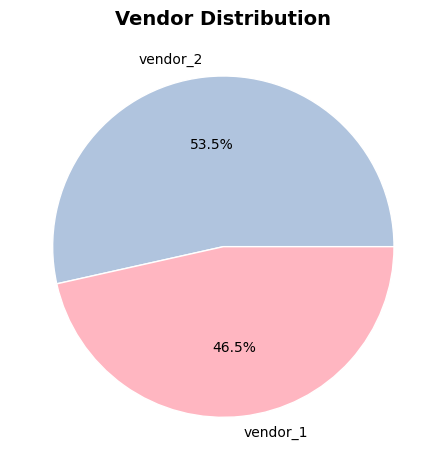

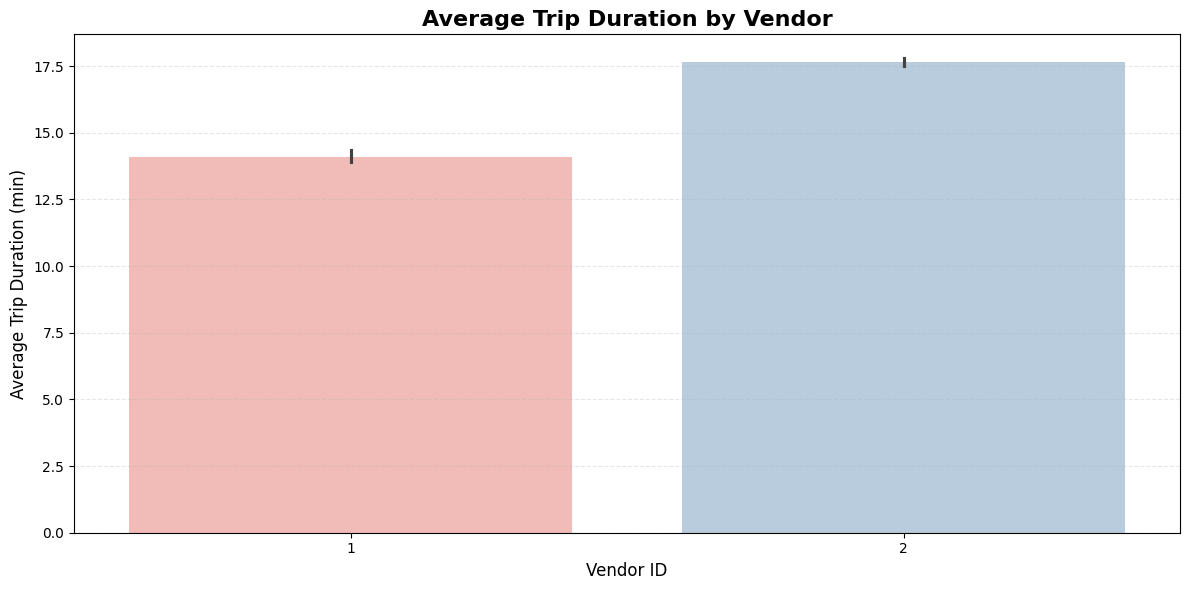

In [ ]:
# Chart - 1 visualization code

# count of trips by each vendor

val = df['vendor_id'].value_counts()
lab = ['vendor_1' if i == 1 else 'vendor_2' for i in val.index]
plt.pie(val,labels=lab,autopct='%0.1f%%',colors=['lightsteelblue', 'lightpink'],wedgeprops={'edgecolor': 'white'},radius=1)
plt.title('Vendor Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
print(" ")

# avg trip duration by each vendor
plt.figure(figsize=(12,6))
fig = sns.barplot(data=df, x='vendor_id', y='trip_duration_min', palette='Pastel1',hue='vendor_id',legend=False)

plt.xlabel('Vendor ID', fontsize=12)
plt.ylabel('Average Trip Duration (min)', fontsize=12)
plt.title('Average Trip Duration by Vendor', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart visualizes the proportional distribution of trips completed by each vendor.

The bar chart effectively compares the average trip duration between vendors.

##### 2. What is/are the insight(s) found from the chart?

* Vendor 2 has a slightly higher share of trips than Vendor 1.
* However, Vendor 1 has a longer average trip duration compared to Vendor 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* As, Vendor 2 is handling more trips but with shorter durations, it could point to higher operational efficiency or a focus on quick urban rides.

*negative impact*
* Longer durations from Vendor 1 may be due to delays, inefficient routing, or traffic bottlenecks, it could negatively affect customer satisfaction.

Vendor 1 might risk losing demand, from customers prefering quicker rides.

#### Chart - 2

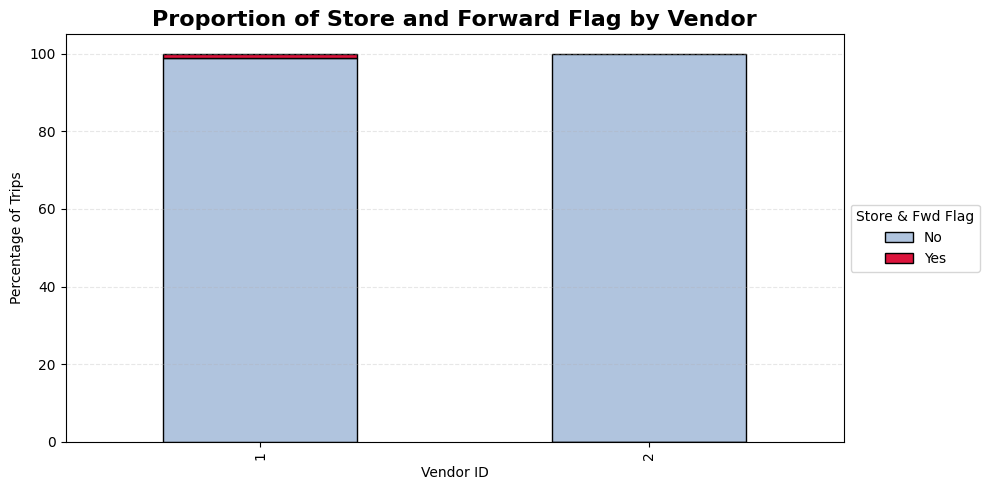

In [ ]:
# Chart - 2 visualization code

# store_and_fwd_flag trips by each vendor

plot_df = df.groupby(['vendor_id', 'store_and_fwd_flag']).size().unstack().fillna(0)
plot_df_percent = (plot_df.T / plot_df.sum(axis=1)).T * 100
plot_df_percent.columns = ['No', 'Yes']

plot_df_percent.plot(kind='bar', stacked=True, figsize=(10,5), color=['lightsteelblue','crimson'], edgecolor='black')
plt.title('Proportion of Store and Forward Flag by Vendor', fontsize=16, weight='bold')
plt.xlabel('Vendor ID')
plt.ylabel('Percentage of Trips')
plt.legend(title='Store & Fwd Flag', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar charts are great for showing part-to-whole relationships across categories while allowing easy visual comparison between vendors.

It compare the proportion of 'store_and_fwd_flag' statuses (Yes/No) for each vendor.

##### 2. What is/are the insight(s) found from the chart?

* Majority of trips for both vendors have the 'No' flag, meaning they were updated in the server in real-time.
* Vendor 1 has a slightly higher proportion of ‘Yes’ flags, meaning a part of its trip data was stored and forwarded later.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This analysis helps understand data integrity and real-time reliability by vendor.
In case of real time live tracking, ETA, or fraud detection, Vendor 1 may need tech upgrades or better signal coverage.

*negative impact*
* Vendor 1, with comparatively higher "Yes" rates, might face credibility issues if not addressed.
* Higher rate of 'Yes' in the store_and_fwd_flag can signal data transmission delays,which can lead to
customer dissatisfaction ,operational inefficiencies and data inconsistency

#### Chart - 3

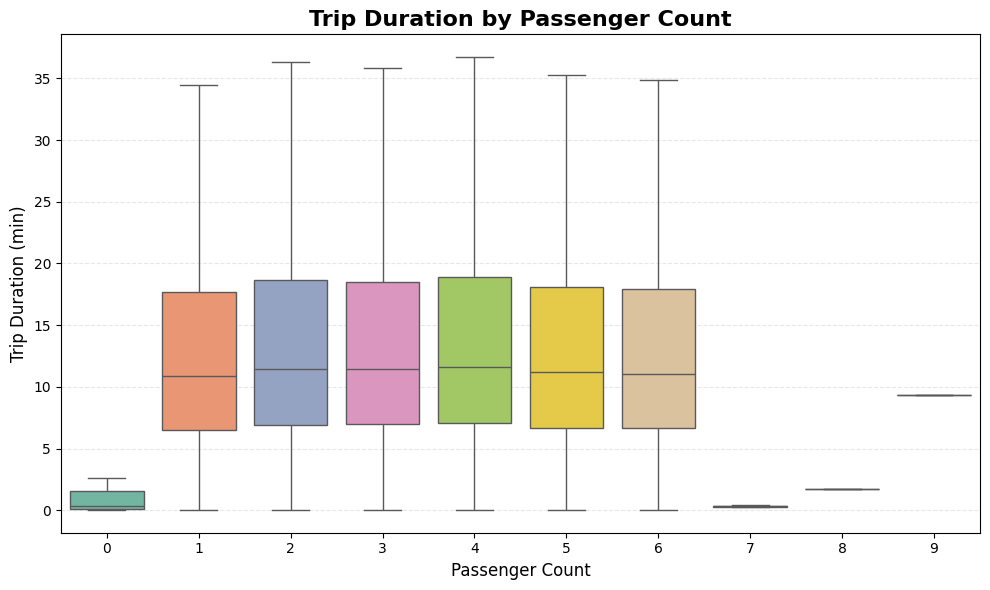

In [ ]:
# Chart - 3 visualization code

# Trip Duration by Passenger Count

plt.figure(figsize=(10, 6))
sns.boxplot( data=df, x='passenger_count', y='trip_duration_min', palette='Set2',hue='passenger_count', legend=False,showfliers=False)

plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Trip Duration (min)', fontsize=12)
plt.title('Trip Duration by Passenger Count', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are ideal for comparing spread, median, and potential outliers across categories.

Here, a boxplot was used to analyze the distribution of trip durations across different passenger counts.

##### 2. What is/are the insight(s) found from the chart?

* Most trips have 1–2 passengers, which aligns with typical cab usage.
* Across all passenger counts, the median trip duration remains relatively similar, meaning number of passengers does not heavily influence trip time.
* Higher passenger counts (5–6) have fewer data points but show slightly higher variation in duration.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This data could support shared ride strategies or carpooling models (adding to vendors profit), since adding more passengers doesn't drastically increase trip time.

*negative impact*
* Passenger counts of 5–6 indicates cases (like shared rides or van bookings). If these have inconsistent durations, it could affect customer satisfaction in high-capacity segments.

#### Chart - 4

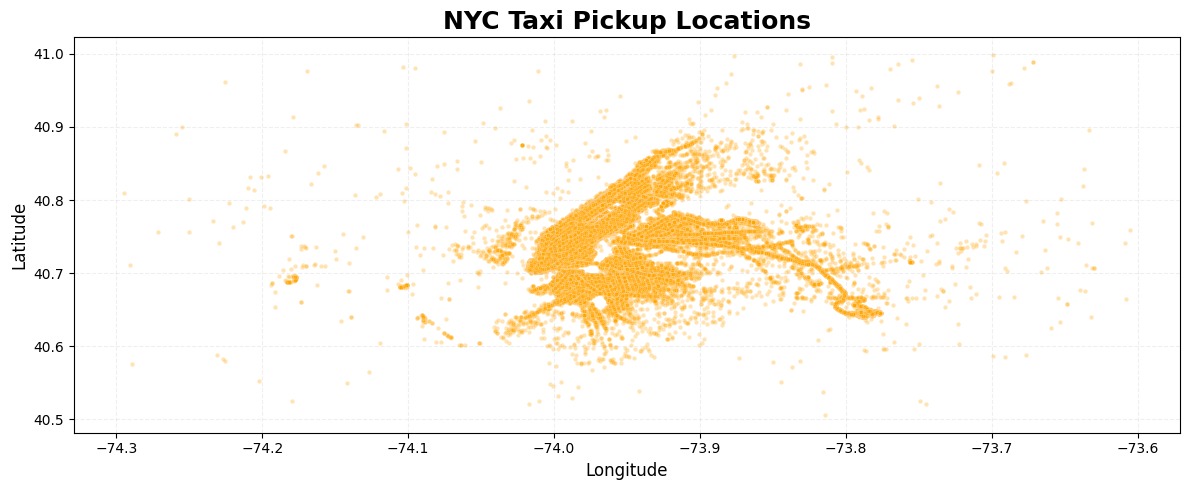

In [ ]:
# Chart - 4 visualization code

# Filter pickups (removing outliers)
nyc_lat_min = 40.5
nyc_lat_max = 41.0
nyc_lon_min = -74.3
nyc_lon_max = -73.6

# NYC taxi pick up locations

df_nyc = df[ (df['pickup_latitude'].between(nyc_lat_min, nyc_lat_max)) &
             (df['pickup_longitude'].between(nyc_lon_min, nyc_lon_max)) ]

plt.figure(figsize=(12,5))
sns.scatterplot(data=df_nyc,x='pickup_longitude',y='pickup_latitude',s=10,alpha=0.3,color = 'orange')

plt.title('NYC Taxi Pickup Locations', fontsize=18, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is ideal for showing the geographic distribution of pickup points using latitude and longitude, painting a literal picture of taxi activity across NYC and helps visualize spatial clusters or high-demand areas.

##### 2. What is/are the insight(s) found from the chart?

* The pickup points are heavily clustered around core NYC zones, especially Midtown Manhattan, Downtown, and JFK area.
* The density pattern shows centralized demand, highlighting common passenger hubs like business districts and tourist hotspots.
* Sparse regions show that taxis are less active in countryside area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Companies can hire more driver based on demanding   hotspots.
* Marketing (e.g., hotel tie-ins, airport offers) can be targeted in dense pickup zones.
* Surge pricing can benefit from these spatial demand patterns.

*negative impact*
* Too many pickups are concentrated in one area, traffic congestion or delays could hurt service quality or fuel costs.

#### Chart - 5

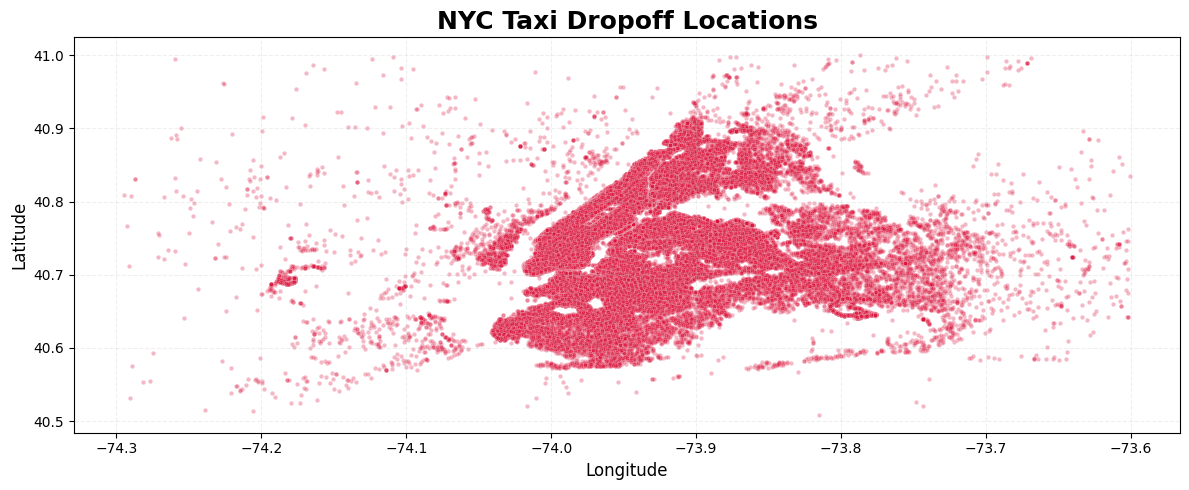

In [ ]:
# Chart - 5 visualization code

# Filter dropoffs (removing outliers)
nyc_lat_min = 40.5
nyc_lat_max = 41.0
nyc_lon_min = -74.3
nyc_lon_max = -73.6

# NYC taxi drop off locations

df_nyc = df[ (df['dropoff_latitude'].between(nyc_lat_min, nyc_lat_max)) &
             (df['dropoff_longitude'].between(nyc_lon_min, nyc_lon_max)) ]

plt.figure(figsize=(12,5))

sns.scatterplot(data=df_nyc,x='dropoff_longitude',y='dropoff_latitude',s=10,alpha=0.3,color='crimson')

plt.title('NYC Taxi Dropoff Locations', fontsize=18, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is ideal for showing the geographic distribution of dropoff points using latitude and longitude, painting a literal picture of taxi activity across NYC and helps visualize spatial clusters or high-demand areas.

##### 2. What is/are the insight(s) found from the chart?

* Dropoff clusters heavily overlap with pickup zones — mainly around Manhattan, downtown areas, and airport zones.
* Also, a wider spread in outer regions, compared to pickup locations — suggesting many people travel from city center to outer areas.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It allows for strategic driver routing, especially during peak times.
* Analyzing dropoff hotspots helps pre-position drivers smartly, improving utilization.

*negative impact*
* If many dropoffs happen in low-pickup zones, drivers may have to travel without any passengers, causing fuel wastage and revenue dips.
* Customer wait times may increase if drivers avoid areas with poor pickup demand after dropoffs — leading to service imbalance.

#### Chart - 6

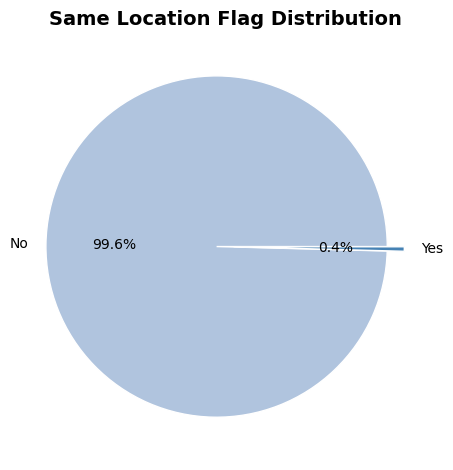

/tmp/ipython-input-70-316145399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.axes.set_xticklabels(['No', 'Yes'])


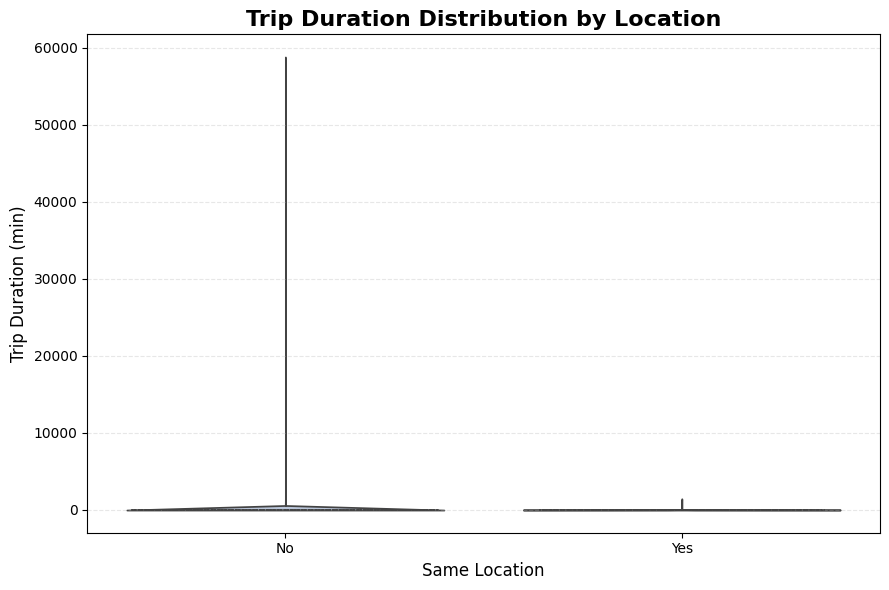

In [ ]:
# Chart - 6 visualization code

# count of trips with same_location drop off

val = df['same_location_flag'].value_counts()
lab = ['Yes' if i == 1 else 'No' for i in val.index]
plt.pie(val,labels=lab,autopct='%0.1f%%',colors=['lightsteelblue', 'steelblue'],explode=[0.05, 0.05],wedgeprops={'edgecolor': 'white'}, radius = 1)
plt.title('Same Location Flag Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# trip duration vs same_location_flag

plt.figure(figsize=(9, 6))
fig = sns.violinplot(data=df, x='same_location_flag', y='trip_duration_min', palette='PuBu',hue='same_location_flag',legend=False ,inner='quartile')

fig.axes.set_xticklabels(['No', 'Yes'])
plt.xlabel('Same Location', fontsize=12)
plt.ylabel('Trip Duration (min)', fontsize=12)
plt.title('Trip Duration Distribution by Location', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows the proportion of trips where the pickup and dropoff locations are the same.

A violin plot is used to examine the distribution of trip durations for both categories. Violin plots are for spotting distribution shape, median, and variability all at once.

##### 2. What is/are the insight(s) found from the chart?

* Pie chart shows that a small percentage of trips have the same pickup and dropoff location — likely canceled, test rides, or GPS glitches.
* Same-location trips have quite short durations, indicating near-zero ride time.
* Normal trips show a wider distribution, with a smooth spread from short to long durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It helps detect misuse,  accidental trip starts/stops, or even possible fraudulent activity (e.g., inflating trip counts for incentives).
* Can be used to improve GPS systems, driver training, or app used.

*negative impact*
* These trips waste time and operational cost without any revenue gain.
* It can inflate performance metrics like trip count.
* Could lead to frustration for riders if the app doesn't flag the mistake — especially if they’re charged.

#### Chart - 7

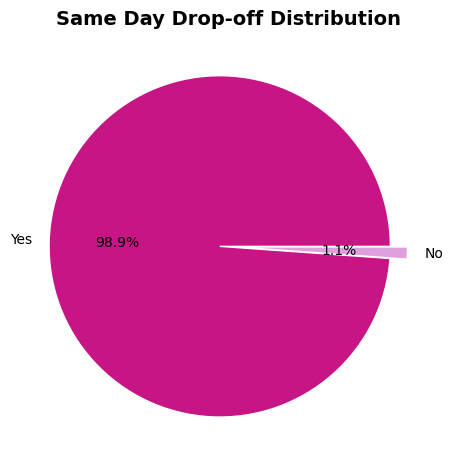

/tmp/ipython-input-73-2636491103.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.axes.set_xticklabels(['No', 'Yes'])


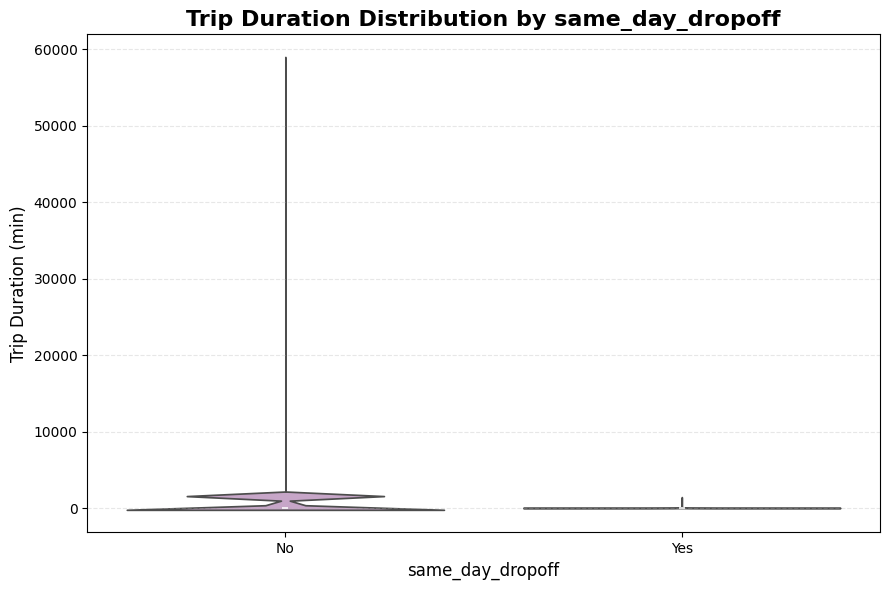

In [ ]:
# Chart - 7 visualization code

# count of trips with same day drop off

val = df['same_day_dropoff'].value_counts()
lab = ['Yes' if i == 1 else 'No' for i in val.index]
plt.pie(val,labels=lab,autopct='%0.1f%%',colors=['mediumvioletred', 'plum'],explode=[0.05, 0.05],wedgeprops={'edgecolor': 'white'},radius=1)
plt.title('Same Day Drop-off Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# trip duration vs same_day_dropoff

plt.figure(figsize=(9,6))
fig = sns.violinplot(data=df, x='same_day_dropoff', y='trip_duration_min', palette='PuRd',hue='same_day_dropoff',legend=False)

fig.axes.set_xticklabels(['No', 'Yes'])
plt.xlabel('same_day_dropoff', fontsize=12)
plt.ylabel('Trip Duration (min)', fontsize=12)
plt.title('Trip Duration Distribution by same_day_dropoff', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps us understand the proportion of trips that ended on the same day vs those that didn’t.

Violin plot are perfect for spotting extreme durations and central trends side by side. This plot gives insight into trip duration distribution for both categories.

##### 2. What is/are the insight(s) found from the chart?

* Pie chart shows that the majority of trips are completed on the same day.
* Same-day drop-offs have a tight distribution centered around typical ride durations.
* Next-day drop-offs indicates much longer durations, indicating a few very long or abnormal trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* In case of succesful long trips by a particular vendor, will only lead to betterment of company's image that it can cover trips with types of trip length
(short, medium, long).

*negative impact*
* In case of any fraud driver, where h/she never turns off the trip(even after the ride ended) would lead to increase in trip fare, resulting in loss of customers

#### Chart - 8

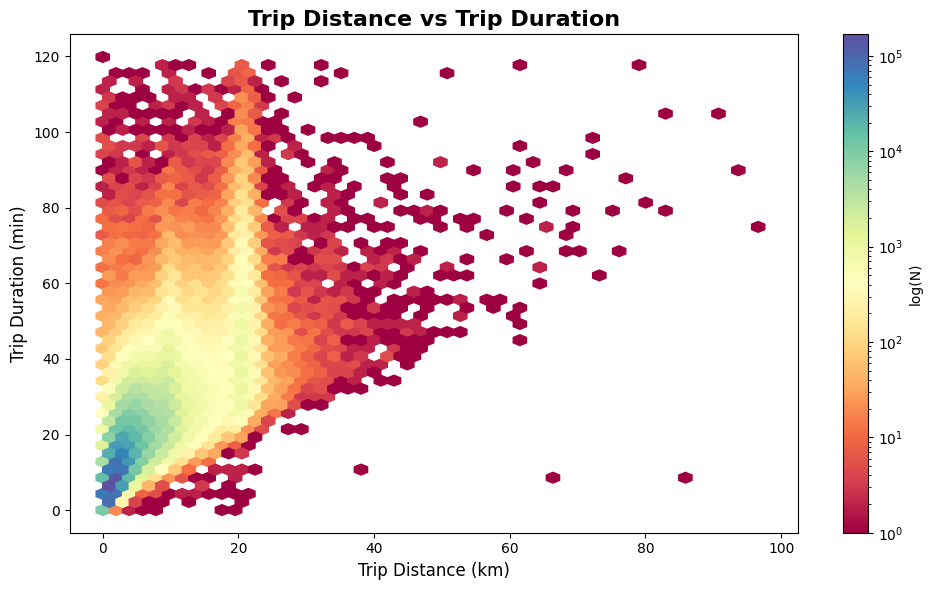

In [ ]:
# Chart - 8 visualization code

# trip_duration_min vs trip_distance_km

#filtering out outliers with appropiate trip distance and duration
max_dist = 100       # reasonable upper limit
max_dur = 120      # 2 hours

# Apply the mask
df_filter = df[ (df['trip_distance_km'] <= max_dist) & (df['trip_duration_min'] <=max_dur) ].copy()

plt.figure(figsize=(10, 6))
plt.hexbin(df_filter['trip_distance_km'], df_filter['trip_duration_min'],gridsize=50, cmap='Spectral', bins='log')

plt.xlabel('Trip Distance (km)', fontsize=12)
plt.ylabel('Trip Duration (min)', fontsize=12)
plt.title('Trip Distance vs Trip Duration', fontsize=16, weight='bold')
plt.colorbar(label='log(N)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Hexbin groups the overlapping points into colored hexagons, making density patterns pop, which would seem like total mess with scatter plot.

Hexbin plot was selected to visualize the relationship between trip distance (in km) and trip duration (in min) for a large dataset.

##### 2. What is/are the insight(s) found from the chart?

* There’s a strong positive relationship between trip distance and duration : as longer trips generally take more time.
* Most trips cluster in the lower-left zone — covering short distances (0–10 km) trip with short durations (0–30 mins).
* There’s a visible diagonal streak — suggesting a fairly consistent pace across different distances.
* There seems less density as we move further up and right — depicting longer trips are rarer but still regular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Validates that trip duration can be reliably predicted using trip distance — great for ETA models, fare calculators, or traffic pattern analysis.
* Fleet planning improves when we know how trip length impacts vehicle availability.

*negtaive impact*
* If the dense low-end trips are being underpriced, the business could be losing potential revenue on high-volume routes.
* In case of non linear graph, point towards poor route optimization, inefficient drivers.

#### Chart - 9

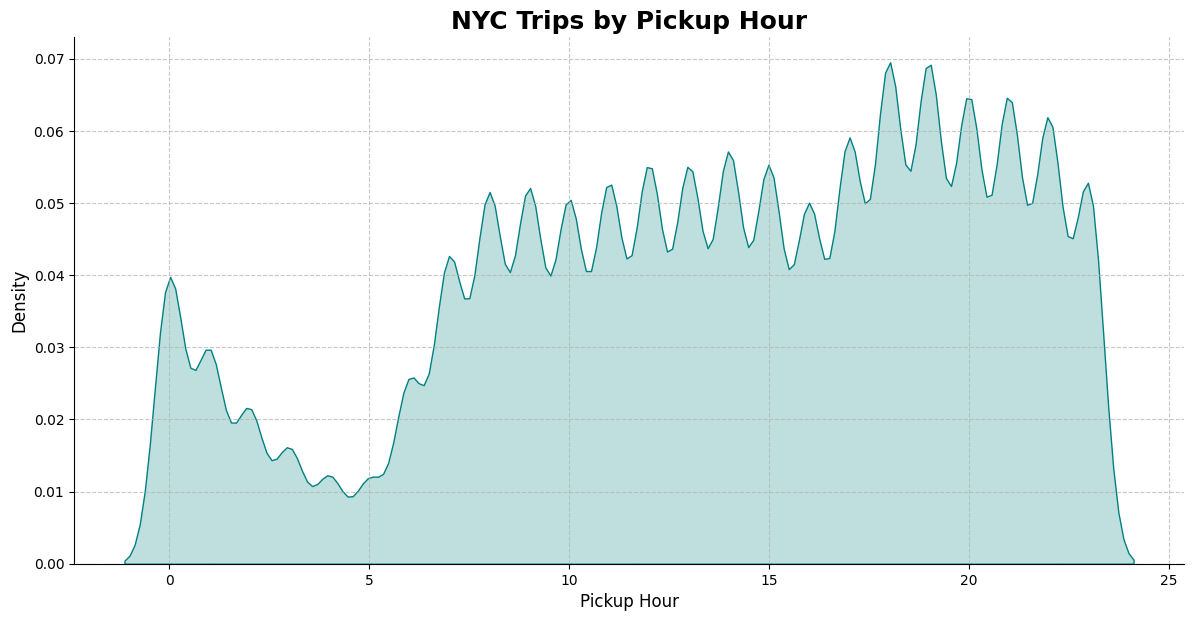

In [ ]:
# Chart - 9 visualization code

# Trips by pickup hour

sns.displot( data=df, x='pickup_hour',kind='kde', fill=True, height=6, aspect=2, color='teal')

plt.title('NYC Trips by Pickup Hour', fontsize=18, weight='bold')
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

KDEs are great in case of visualizing peak trends.

Kernel Density Estimation (KDE) plot was chosen to analyze the distribution of taxi pickups across different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

* There are two clear demand peaks: One in the morning (around 8–10 AM) — office rush hour and another in the evening (around 5–8 PM) — office closing time, and evening outseeing.
* There’s a noticeable dip in late night/early morning hours (2–5 AM), as it's sleeping time for most of the humans.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Knowing the peak pickup hours, allows better driver deployment and fleet balancing.
* Dynamic pricing can be optimized — surge fare during these hours can boost revenue.
* Helps with maintenance scheduling, driver shifts, and customer service coverage — align them with low-demand hours.

*negative impact*
* In case the company is understaffed, it may result in high wait times, trip cancellations and customer dissatisfaction.

#### Chart - 10

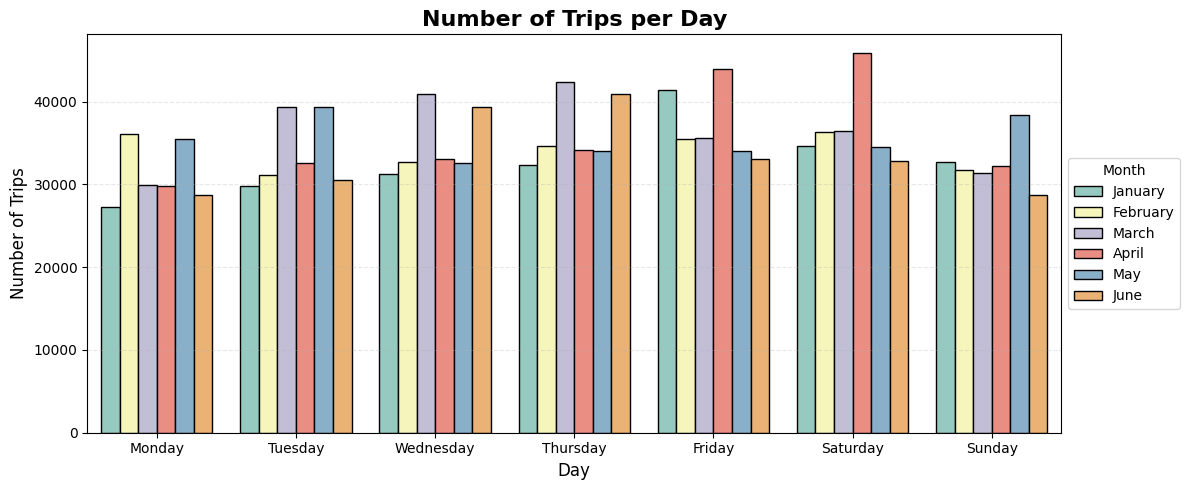

In [ ]:
# Chart - 10 visualization code

# number of trips month wise and day wise

month_order = ['January', 'February', 'March', 'April', 'May', 'June']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='day_name', palette='Set3', edgecolor='black',order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue='month_name')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Number of Trips per Day', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Month',loc='center left',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar plot is used to analyze how the number of trips varies across days of the week, and how that changes month by month.

##### 2. What is/are the insight(s) found from the chart?

* Fridays and Saturdays are consistently high-demand days, likely due to weekend.
* Sundays and Mondays usually show lower trip counts - lazy return to school/offices.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Can help optimize driver rosters, shift planning, and incentives for high-traffic days (friday, saturday).
* Promos for quieter days like Monday/Tuesday can balance out demand.

*negative impact*
* Over-supplying on low-demand weekdays could result in driver burnout and idle time, reducing satisfaction and profit margins.
* In case, weekend demand surges aren’t matched with supply, the company risks (ride denials or missed revenue).

#### Chart - 11

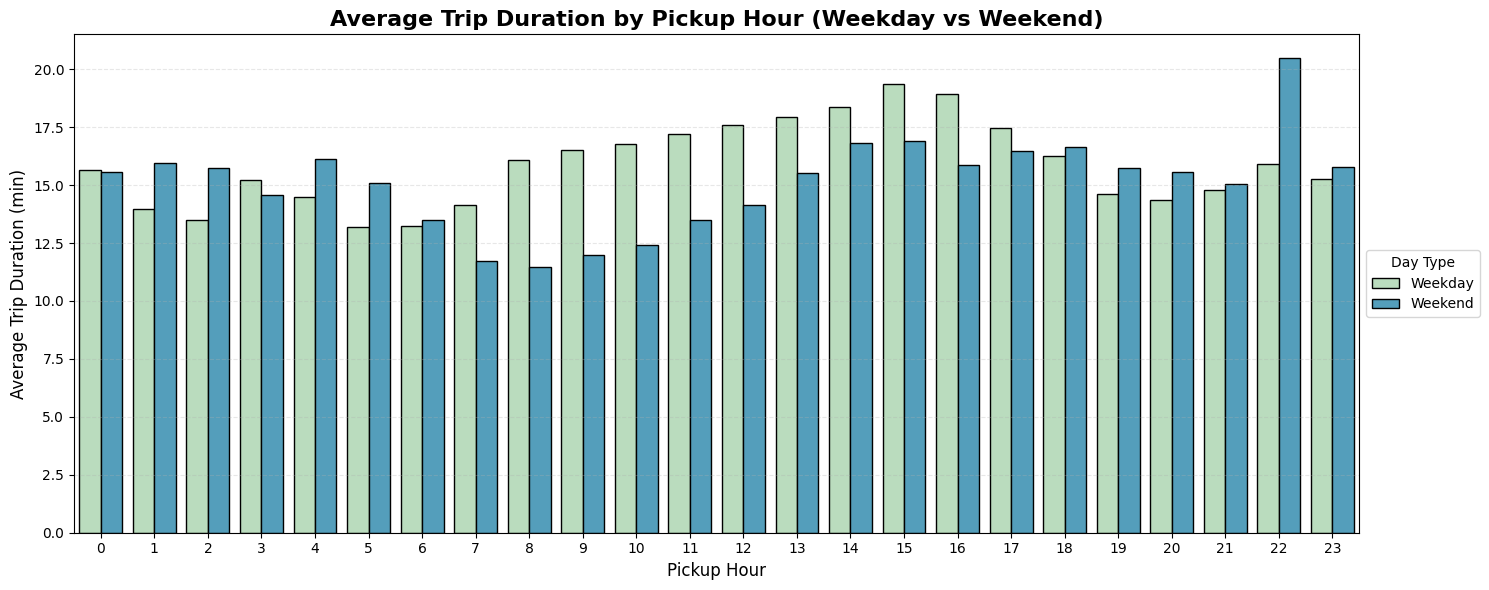

In [ ]:
# Chart - 11 visualization code

# Average Trip Duration by Pickup Hour (Weekday vs Weekend)

plt.figure(figsize=(15, 6))
sns.barplot(data=df,x='pickup_hour', y='trip_duration_min',palette='GnBu',edgecolor='black',hue='is_weekend',errorbar=None )

plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Average Trip Duration (min)', fontsize=12)
plt.title('Average Trip Duration by Pickup Hour (Weekday vs Weekend)', fontsize=16, weight='bold')

plt.legend(title='Day Type',labels=['Weekday', 'Weekend'],loc='center left',bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar chart was chosen to compare average trip duration across hours of the day, split by day type (weekday/weekend).

##### 2. What is/are the insight(s) found from the chart?

* Weekdays tend to have Slightly longer trip durations during morning rush hours (7–10 AM) and evening peak (4–7 PM) - traffic hours.
* Weekends show a smoother distribution, with longer trips later in the day (11 AM–7 PM), possibly due to leisure travel or longer-distance outings.
* Very early morning (0–5 AM) and late-night (10 PM onward) trip durations are relatively short and consistent across both day types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Businesses can adjust surge pricing windows: charge more where trip durations are high.
* Optimize driver shift timing: put more drivers on the road during weekday rush and weekend mid-day.
* Understand when traffic congestion affects operations, helping with ETA accuracy and customer satisfaction.

*negative impact*
* Unhappy customers during rush hours if they face delays without context or compensation.
* Company inefficiencies during mismatch between supply and demand


#### Chart - 12

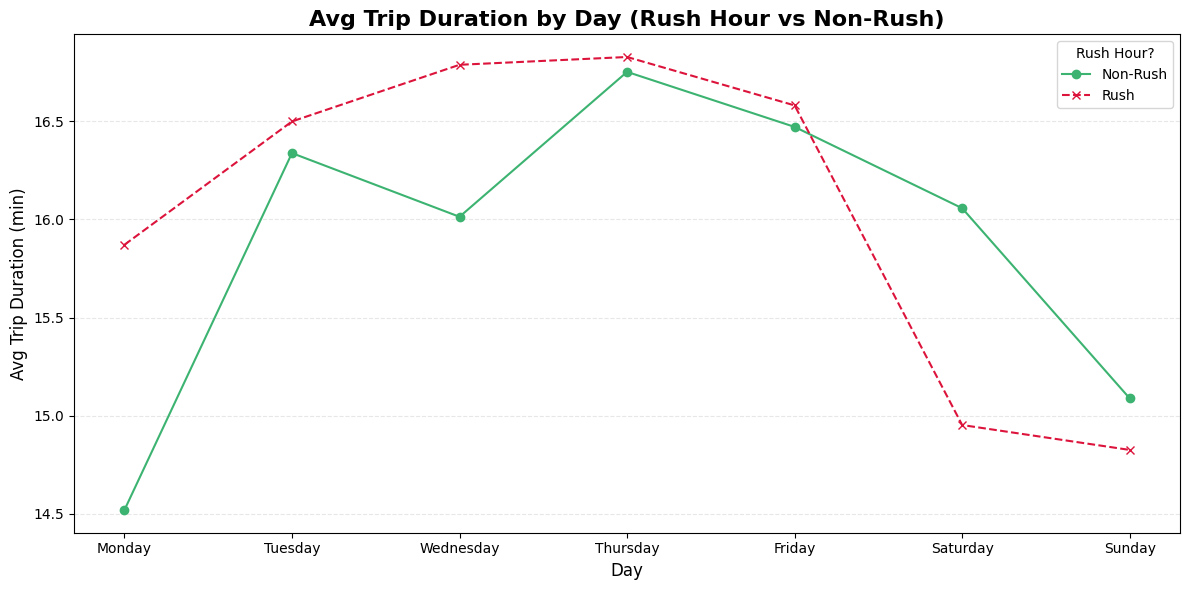

In [ ]:
# Chart - 12 visualization code

# Average Trip Duration by Day (Rush Hour vs Non-Rush)

grouped = df.groupby(['day_name', 'is_rush_hour'])['trip_duration_min'].mean().reset_index()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
grouped['day_name'] = pd.Categorical(grouped['day_name'], categories=day_order, ordered=True)
grouped = grouped.sort_values('day_name')

plt.figure(figsize=(12,6))

# Plot Non-Rush
non_rush = grouped[grouped['is_rush_hour'] == 0]
plt.plot(non_rush['day_name'], non_rush['trip_duration_min'], label='Non-Rush', color='mediumseagreen', linestyle='-', marker='o')

# Plot Rush
rush = grouped[grouped['is_rush_hour'] == 1]
plt.plot(rush['day_name'], rush['trip_duration_min'],label='Rush', color='crimson', linestyle='--', marker='x')

# Titles & labels
plt.title("Avg Trip Duration by Day (Rush Hour vs Non-Rush)", fontsize=16, weight='bold')
plt.xlabel("Day", fontsize=12)
plt.ylabel("Avg Trip Duration (min)", fontsize=12)
plt.legend(title='Rush Hour?')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are great for showing trends across ordered categories, like days of the week — and splitting by rush hour reveals how traffic behavior impacts ride time.
line plot was used to compare average trip duration across weekdays, split into Rush Hour vs Non-Rush Hour.

##### 2. What is/are the insight(s) found from the chart?

* Rush hour trips consistently take longer than non-rush ones across all days.
* The duration gap between Rush and Non-Rush is highest on weekdays, especially Tuesday to Friday — indicating heavy commuter traffic.
* Weekends (Saturday & Sunday) show less variation between rush and non-rush durations, reflecting lighter and smoother traffic. - holiday period for students and office workers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Can be used to dynamically adjust fare multipliers based on day + rush status.
* Helps plan driver incentives or bonus windows during high-delay periods to keep supply consistent.

*negative impact*
* Driver frustration if high-rush periods aren’t compensated fairly.

#### Chart - 13

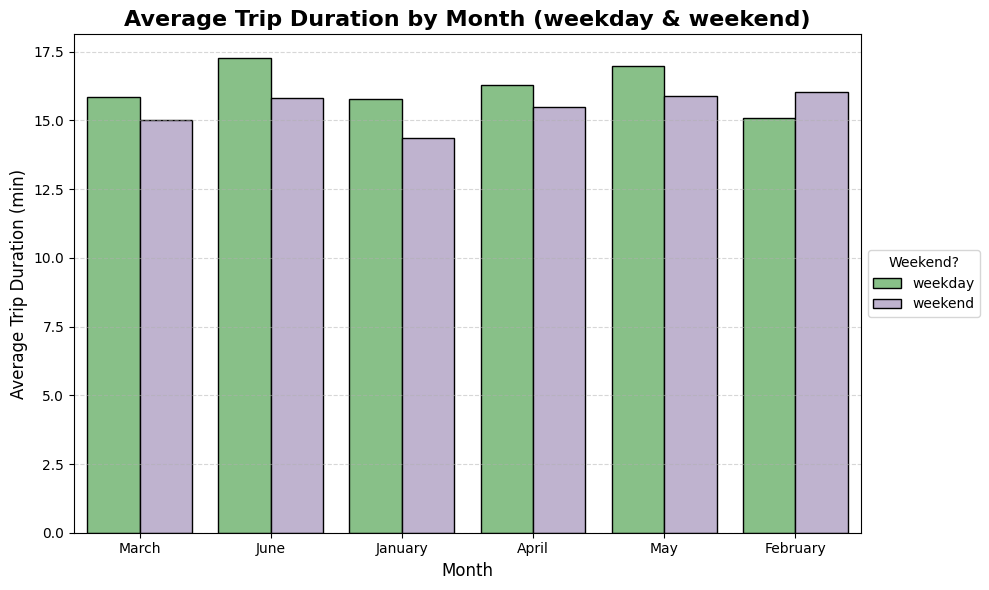

In [ ]:
# Chart - 13 visualization code

# Average Trip Duration by Month (Rush Hour vs Non-Rush)

plt.figure(figsize=(10, 6))

sns.barplot(data=df ,x='month_name', y='trip_duration_min',hue='is_weekend',palette='Accent',edgecolor='Black',errorbar=None)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Trip Duration (min)', fontsize=12)
plt.title('Average Trip Duration by Month (weekday & weekend)', fontsize=16, weight='bold')

plt.legend(title='Weekend?',labels=['weekday', 'weekend'],loc='center left',bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Grouped bar chart effectively compares, two categorical variables: month_name and is_weekend against a numerical metric: trip_duration_min.

It clearly shows month-to-month trends in trip duration.

##### 2. What is/are the insight(s) found from the chart?

* Trip durations fluctuate across months, months (like May or June) tend to show longer trips compared to others like January or March.
* Weekday trips tend to be longer than weekend trips in many months.
* The difference between weekday and weekend durations is most noticeable in February and May — suggesting behavioral variance across months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Monthly trend knowledge enables better fleet planning — e.g., if May is high-duration, more drivers might be needed to meet demand.
* Supports dynamic pricing logic — longer durations,  more fuel/time, so, higher fare.

*negative impact*
* Cause driver fatigue if trips are longer than expected.
* Result in unfair flat pricing for longer weekend trips.

#### Chart - 14

<Figure size 900x400 with 0 Axes>

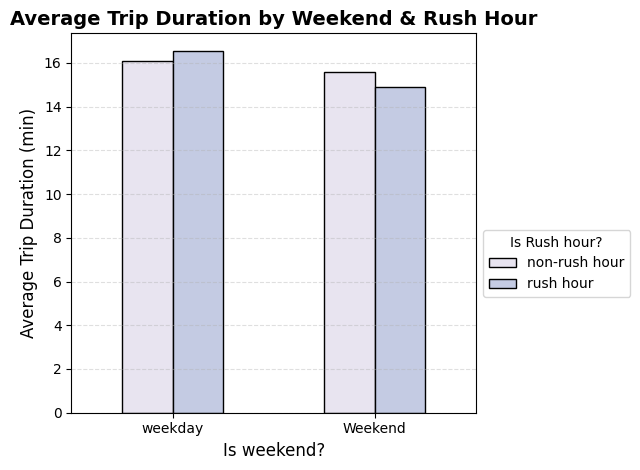

In [ ]:
# Chart - 14 visualization code

#Average Trip Duration by Rush Hour & Weekend

plt.figure(figsize=(9,4))
ds=df.groupby(['is_weekend','is_rush_hour'])['trip_duration_min'].mean().unstack().plot(kind='bar',color = sns.color_palette('PuBu'), edgecolor='black')

ds.set_xticklabels(['weekday', 'Weekend'])
plt.xlabel('Is weekend?', fontsize=12)
plt.ylabel('Average Trip Duration (min)', fontsize=12)
plt.title('Average Trip Duration by Weekend & Rush Hour', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Is Rush hour?', labels=['non-rush hour', 'rush hour'],bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar chart compares multiple categorical variables (is_weekend and is_rush_hour) across a numeric metric (trip_duration_min)

##### 2. What is/are the insight(s) found from the chart?

* Rush hour trips take longer than non-rush trips — both on weekdays and weekends (expected due to traffic congestion).
* Weekday rush hour durations are likely the highest overall.
* Weekend non-rush trips might be the shortest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Knowing when trips are longer helps optimize driver allocation and trip pricing.
* Understanding time-based patterns helps improve ETA models, reduce cancellations, and plan efficient routing.
*  If weekend traffic is lighter, marketing can encourage weekend travel offers or ride-sharing promotions.

*negative imapct*
* Longer trips may increase passenger dissatisfaction.
* Cancellation rate may be high, as ETA is high.
* Less trips/hour may lead to less earning.


#### Chart - 15 - Correlation Heatmap

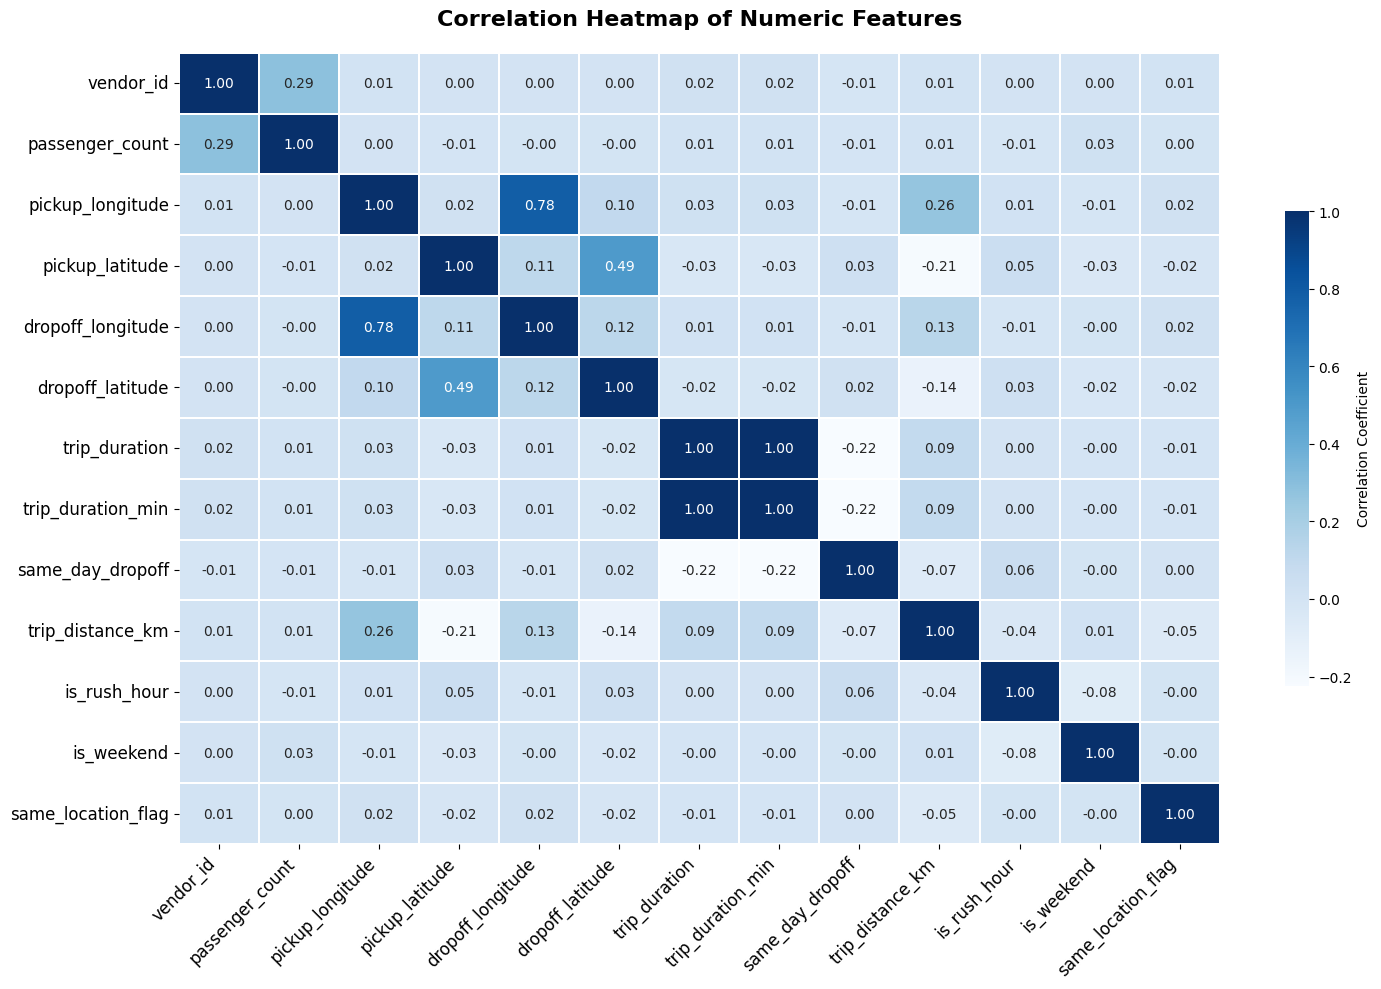

In [ ]:
# Correlation Heatmap visualisation code

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='Blues',
    linewidths=0.3,linecolor='white',
    cbar_kws={'shrink': 0.6, 'label': 'Correlation Coefficient'},
    annot_kws={"size":10}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 It provides a clear, compact, and color-coded overview of how all the numerical variables in the dataset are related to one another.

 Also, it helps identify, strong positive or negative correlations and redundancy in features.

##### 2. What is/are the insight(s) found from the chart?

* trip_duration_min and trip_distance_km, strong positive correlation
* pickup_hour and is_rush_hour, moderate to strong correlation
* low importance of passenger_count



#### Chart - 16 - Pair Plot

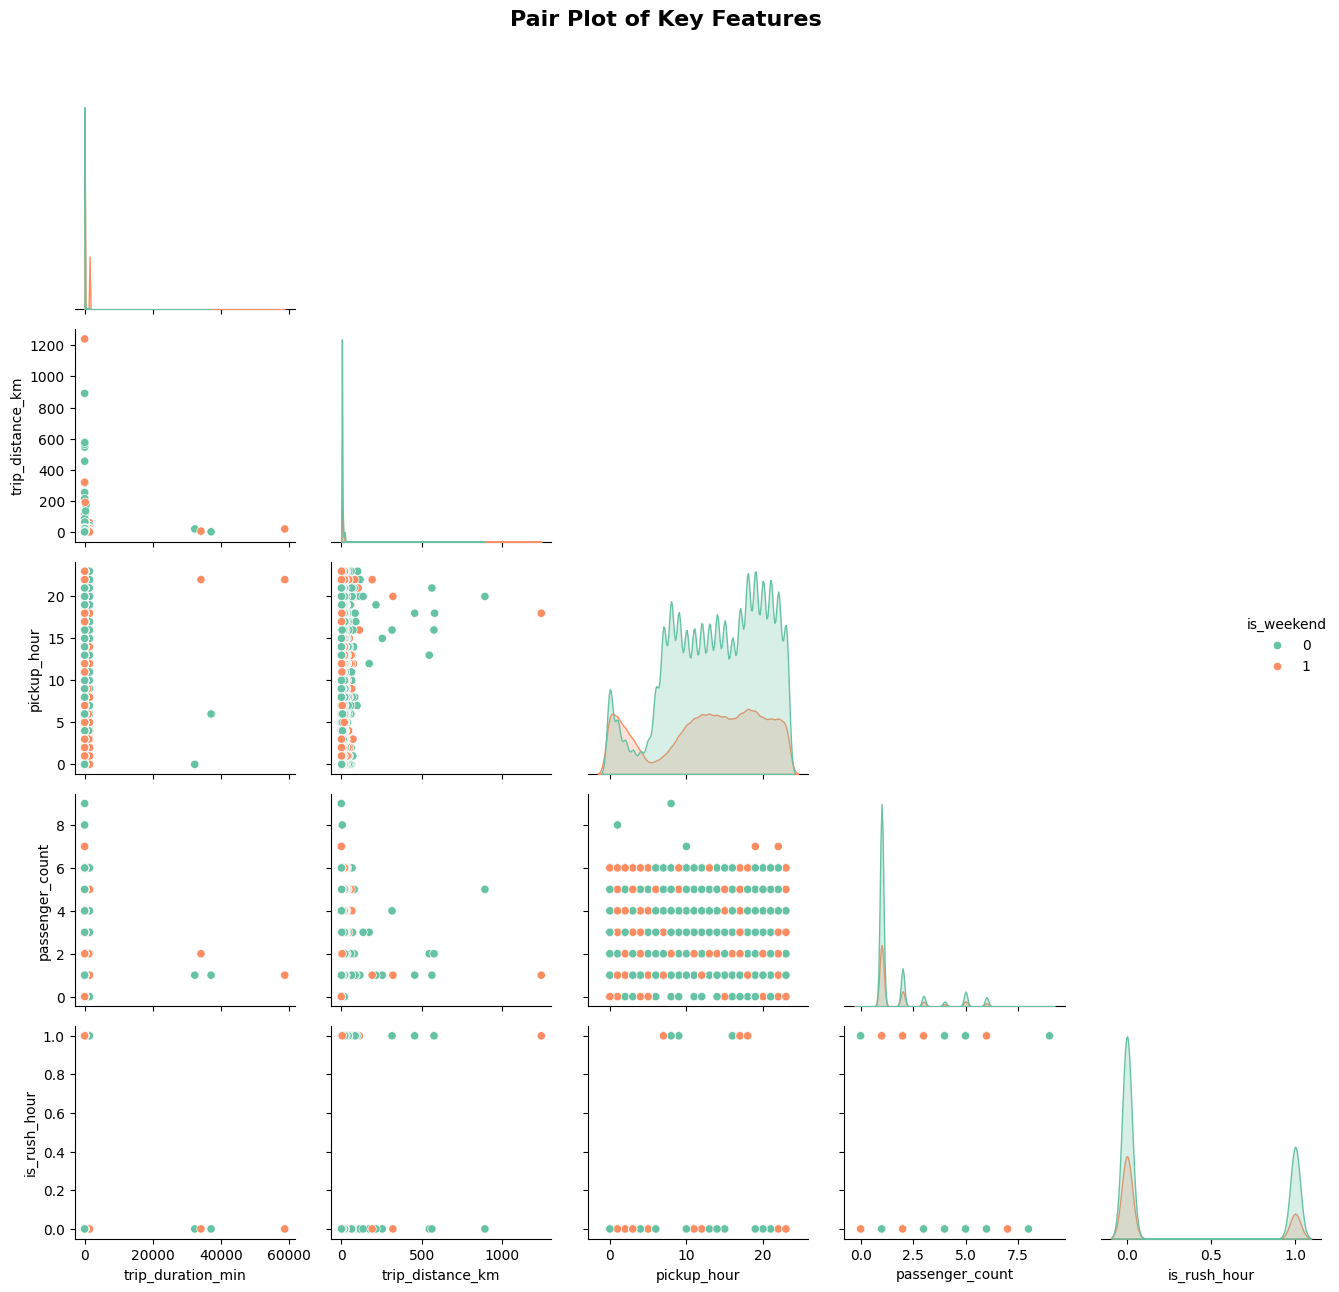

In [ ]:
# Pair Plot visualization code

selected_features = ['trip_duration_min', 'trip_distance_km', 'pickup_hour',
                     'passenger_count', 'is_weekend', 'is_rush_hour']

sns.pairplot(df[selected_features], hue='is_weekend', palette='Set2', corner=True, diag_kind='kde')
plt.suptitle("Pair Plot of Key Features", y=1.03, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is perfect EDA for exploring relationships between multiple numeric features in one visual grid, showing both distribution and correlation (via scatter plots below the diagonal).

##### 2. What is/are the insight(s) found from the chart?

* Strong positive correlation between trip_duration_min and trip_distance_km, as longer trips cover more distance.
* pickup_hour may show banded patterns or time-based clusters, as rush hour may effect visually, like more trips or different duration trends around specific hours.
* passenger_count is likely categorical-like, vertical striping, meaning most rides have 1–2 passengers.
* is_weekend and is_rush_hour may not visually affect distributions strongly

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation

# checking null value if any

df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there are no null values present, there is no need for missing value imputation.

### 2. Handling Outliers

In [51]:
# Handling Outliers & Outlier treatments

# Filter out trips with duration less than equal 1 min and greater than equal to 2 hours, which may further cause any errors
df = df[(df['trip_duration_min'] >= 1) & (df['trip_duration_min'] <= 120)]

# Filter out trips with distance  ess than equal 0.5 km and greater than equal to 50 km , which may further cause any errors
df = df[(df['trip_distance_km'] >= 0.5) & (df['trip_distance_km'] <= 50)]


# NYC boundaries (roughly)
nyc_lat_min = 40.5
nyc_lat_max = 41.0
nyc_lon_min = -74.3
nyc_lon_max = -73.6

# Filter out trips lying outside above defined boundaries
df = df[(df['pickup_latitude'].between(nyc_lat_min, nyc_lat_max)) & (df['pickup_longitude'].between(nyc_lon_min, nyc_lon_max)) ]
df = df[(df['dropoff_latitude'].between(nyc_lat_min, nyc_lat_max)) & (df['dropoff_longitude'].between(nyc_lon_min, nyc_lon_max)) ]

In [ ]:
df.shape

(1407694, 20)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used range based filtering for
* trip_duration_min
* trip_distance_km
* pickup_latitude, pickup_longitude
* dropoff_latitude, dropoff_longitude

This technique is effective for cleaning up absurd or clearly wrong entries (like trips that are 0 km or 9999 minutes long) and is easy to explain and justify. Also works faster, especially on large datasets.

### 3. Categorical Encoding

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_min,same_day_dropoff,trip_distance_km,pickup_hour,is_rush_hour,day_name,is_weekend,month_name,same_location_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.58,1,1.50,17,1,Monday,0,March,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.05,1,1.81,0,0,Sunday,1,June,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.40,1,6.39,11,0,Tuesday,0,January,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.15,1,1.49,19,0,Wednesday,0,April,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.25,1,1.19,13,0,Saturday,1,March,0


In [52]:
# Label encoding store_and_fwd_flag

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [53]:
# one hot encoding 'day_name' and 'month_name' columns

df = pd.get_dummies(df, columns=['day_name', 'month_name'], drop_first=True)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,month_name_February,month_name_January,month_name_June,month_name_March,month_name_May
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,False,False,False,False,False,False,False,False,True,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,False,True,False,False,False,False,False,True,False,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,False,False,False,True,False,False,True,False,False,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,False,False,False,False,True,False,False,False,False,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,True,False,False,False,False,False,False,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

Since, store_and_fwd_flag has only two values (Y/N), so label encoding is perfect, no need for one-hot encoding.

In case of day_name and month_name column, multiple values are present, so label encoding is not appropiate.Here, drop-first helps to avoid dummy variable trap (multicollinearity).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

Already added new features into dataset in the beginning that include ( 'trip_duration_min', 'same_day_dropoff', 'trip_distance_km','pickup_hour', 'is_rush_hour', 'is_weekend', 'same_location_flag', month_name (one hot encoding done) ,day_name (one hot encoding done) )

#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting

corr = df.corr(numeric_only=True)
f_corr = corr['trip_duration'].sort_values(ascending=False)
print(f_corr)

trip_duration          1.000000
trip_duration_min      1.000000
trip_distance_km       0.772956
pickup_longitude       0.375212
dropoff_longitude      0.234646
day_name_Thursday      0.040240
month_name_June        0.036466
month_name_May         0.032753
is_rush_hour           0.031312
store_and_fwd_flag     0.029404
pickup_hour            0.028314
day_name_Wednesday     0.027184
passenger_count        0.013914
day_name_Tuesday       0.011091
vendor_id              0.006800
month_name_March      -0.014337
day_name_Monday       -0.016521
month_name_January    -0.031262
month_name_February   -0.032260
day_name_Saturday     -0.038689
day_name_Sunday       -0.045968
same_day_dropoff      -0.056370
is_weekend            -0.065379
dropoff_latitude      -0.192026
pickup_latitude       -0.243284
same_location_flag          NaN
Name: trip_duration, dtype: float64


In [ ]:
# dropping trip_duration_min  feature from f_corr

f_corr = f_corr.drop(['trip_duration_min','trip_duration'])

In [55]:
selected_features = f_corr.index.tolist()
selected_features

['trip_duration',
 'trip_duration_min',
 'trip_distance_km',
 'pickup_longitude',
 'dropoff_longitude',
 'day_name_Thursday',
 'month_name_June',
 'month_name_May',
 'is_rush_hour',
 'store_and_fwd_flag',
 'pickup_hour',
 'day_name_Wednesday',
 'passenger_count',
 'day_name_Tuesday',
 'vendor_id',
 'month_name_March',
 'day_name_Monday',
 'month_name_January',
 'month_name_February',
 'day_name_Saturday',
 'day_name_Sunday',
 'same_day_dropoff',
 'is_weekend',
 'dropoff_latitude',
 'pickup_latitude',
 'same_location_flag']

##### What all feature selection methods have you used  and why?

Correlation with Target - Pearson Correlation : Pearson correlation between each numerical feature and the target variable trip_duration_min.

We have used this method as simple & iterpretable	correlation gives direct insight into linear relationships, is easy to understand. It gives a quick view of which features are likely to influence the target. Also, works super fast on large datasets.

##### Which all features you found important and why?

* trip_distance_km	- Most directly related to duration.
* pickup_hour	- Important for rush hour / city traffic.
* is_weekend	- Weekend trips have different dynamics
* is_rush_hour - Captures rush hour effects
* same_location_flag	- Captures invalid/ultrashort trips
* store_and_fwd_flag	- May slightly affect processing/duration
* passenger_count	- Not super strong but potentially useful
* pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude	- Might help models learn geo-specific patterns .
* same_day_dropoff - trip with duration more tha 24 hrs, covering longer trips
* day_name_* -	One-hot encoded → captures weekly trends
* month_name_*	- Seasonal patterns in traffic/ride demand

Dropping columns :
* trip_duration_min - Is of no need, trip_duration(s) column is present.
* trip_duration - Is target label , so dropped out from selected features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

No data transformation is required.



### 6. Data Scaling

In [ ]:
# Scaling your data

# Standardization (Z-Score Scaling)

scaler = StandardScaler()

##### Which method have you used to scale you data and why?

Z-Score Scaling (Standardization method) : This method scales values so they have mean = 0 and std = 1 , appropiate for models such asLinear Regression.



### 7. Dimesionality Reduction

In [ ]:
# dimensionality reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

There is no need for dimensionality reduction, as we have limited countable number of columns.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not Applicable.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x = df[selected_features]
y = df['trip_duration']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,trip_distance_km,pickup_longitude,dropoff_longitude,day_name_Thursday,month_name_June,month_name_May,is_rush_hour,store_and_fwd_flag,pickup_hour,day_name_Wednesday,...,month_name_March,day_name_Monday,month_name_January,month_name_February,day_name_Saturday,day_name_Sunday,is_weekend,dropoff_latitude,pickup_latitude,same_location_flag
85872,1.85,-73.990784,-73.984978,False,False,False,0,0,14,False,...,False,False,False,False,True,False,1,40.724125,40.740154,0
216072,1.16,-73.985596,-73.977821,False,False,False,1,0,17,False,...,False,False,False,True,False,True,1,40.763378,40.754803,0
437948,5.70,-73.971886,-74.011101,False,False,False,0,0,10,False,...,False,False,True,False,False,False,0,40.721561,40.763382,0
319732,2.33,-73.983963,-74.006310,False,False,False,0,0,4,False,...,False,False,True,False,False,False,0,40.733559,40.721279,0
439049,10.52,-73.986900,-73.870743,False,False,False,0,0,14,False,...,False,False,True,False,True,False,1,40.773918,40.739239,0


In [ ]:
y_train.head()

,trip_duration
85872,741
216072,610
437948,1457
319732,631
439049,1082


In [ ]:
x_test.head()

,trip_distance_km,pickup_longitude,dropoff_longitude,day_name_Thursday,month_name_June,month_name_May,is_rush_hour,store_and_fwd_flag,pickup_hour,day_name_Wednesday,...,month_name_March,day_name_Monday,month_name_January,month_name_February,day_name_Saturday,day_name_Sunday,is_weekend,dropoff_latitude,pickup_latitude,same_location_flag
1101530,1.39,-73.959724,-73.964645,False,False,False,0,0,13,False,...,True,False,False,False,False,False,0,40.764946,40.776901,0
1205861,0.82,-73.994896,-74.003662,False,False,False,0,0,14,True,...,False,False,False,True,False,False,0,40.736729,40.740025,0
380002,9.68,-73.991814,-73.946121,False,False,False,0,0,0,False,...,False,False,False,True,False,True,1,40.817085,40.737206,0
613102,2.01,-73.960236,-73.972389,False,False,False,0,0,12,False,...,False,False,False,True,False,True,1,40.760792,40.776325,0
1013656,1.66,-73.951889,-73.963539,False,False,False,0,0,15,False,...,False,False,True,False,False,False,0,40.757469,40.769520,0


In [ ]:
y_test.head()

,trip_duration
1101530,618
1205861,350
380002,1977
613102,490
1013656,344


In [ ]:
# scaling feature

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### What data splitting ratio have you used and why?

We have used, 80/20 ratio (considered as "Golden Ratio") as
* There is enough data to learn	,as 80% gives the model a solid amount of examples to train effectively and sufficient test size	20% gives a decent chunk to evaluate performance reliably
* Avoids overfitting, as too much data for training might be too small to spot overfitting.

### 9. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is not imbalanced as this is a regression task, not classification.

In regression, imbalance usually refers to skewness in the target variable’s distribution rather than class proportions.
In this project, while the target trip_duration_min may show some skewness due to long-duration trips, this can be handled with a log transformation, not traditional class imbalance techniques like oversampling or SMOTE.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not applicable

## ***7. ML Model Implementation***

In [ ]:
# ML MODEL code template

def score_metrix (model,X_train,X_test,Y_train,Y_test):

  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:   # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  # ploting the graph of Actual and predicted only with 100 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(18,6))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title("Actual vs Predicted")
    plt.show()
  except:
    pass

### ML Model - 1

Training score  = 0.6214852401908635
MAE : 275.399412878199
MSE : 160006.4473401038
RMSE : 400.00805909394353
R2 : 0.624661637631205
Adjusted R2 :  0.6246296387938581 



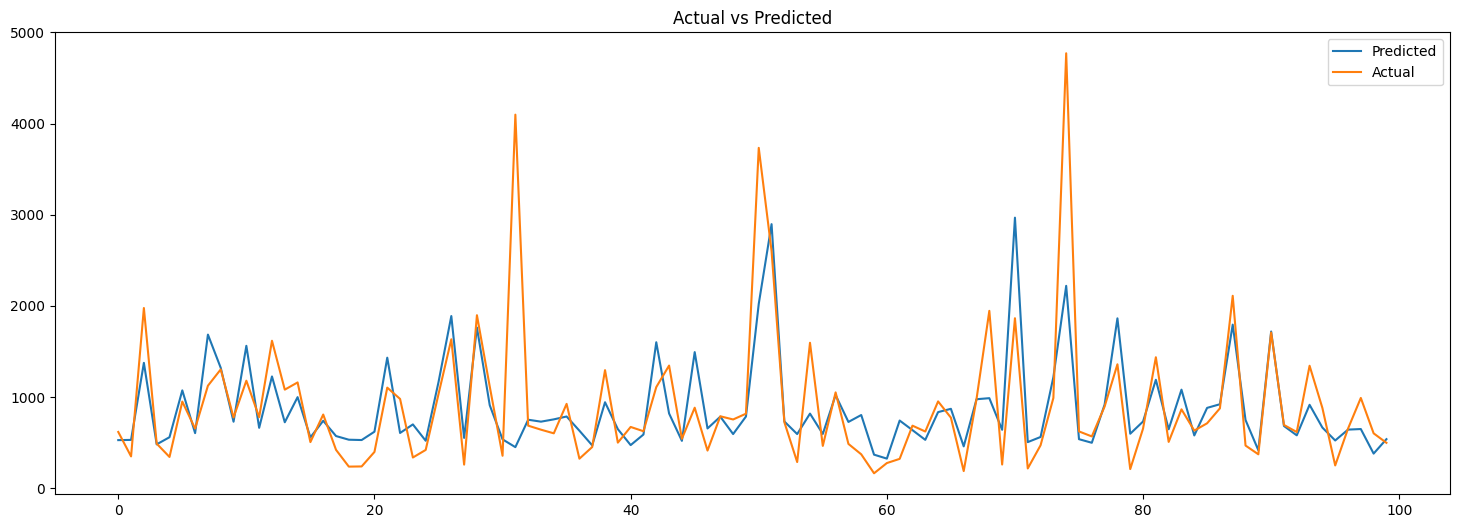

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Lasso

score_metrix(Lasso(), x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

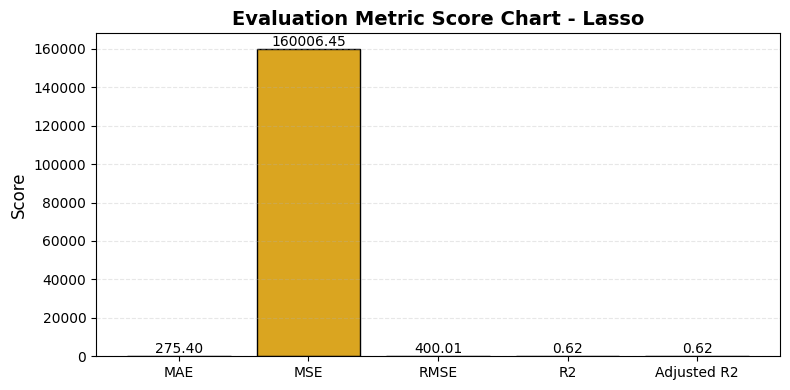

In [ ]:
# Visualizing evaluation Metric Score chart -  Lasso

# Your scores
metrics = { 'MAE':  275.399412878199, 'MSE': 160006.4473401038, 'RMSE': 400.00805909394353, 'R2':0.624661637631205, 'Adjusted R2': 0.6246296387938581  }

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(), color='goldenrod', edgecolor='black')

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Evaluation Metric Score Chart - Lasso', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Lasso Regression :

Lasso Regression is a regularized version of Linear Regression that adds an L1 penalty to the loss function. It’s powerful because, it can shrink some coefficients to zero, effectively doing automatic feature selection and reduces overfitting and helps build simpler, more generalizable models

* MAE - On average, your model is off by ~4.5 hours.
* MSE - Squared error ,large errors
* RMSE - Big errors are happening and being penalized more
* R2 - Model explains 62.5% of the variability in trip durations. Not bad! But not perfect.
* Adjusted_R2 - No overfitting due to unnecessary features.

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.062e+10, tolerance: 3.811e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.206e+10, tolerance: 3.823e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.210e+10, tolerance: 3.827e

Training score  = 0.6215495653870305
MAE : 275.29127064225065
MSE : 159955.7223463
RMSE : 399.9446491032228
R2 : 0.624780626812091
Adjusted R2 :  0.6247486381189656 



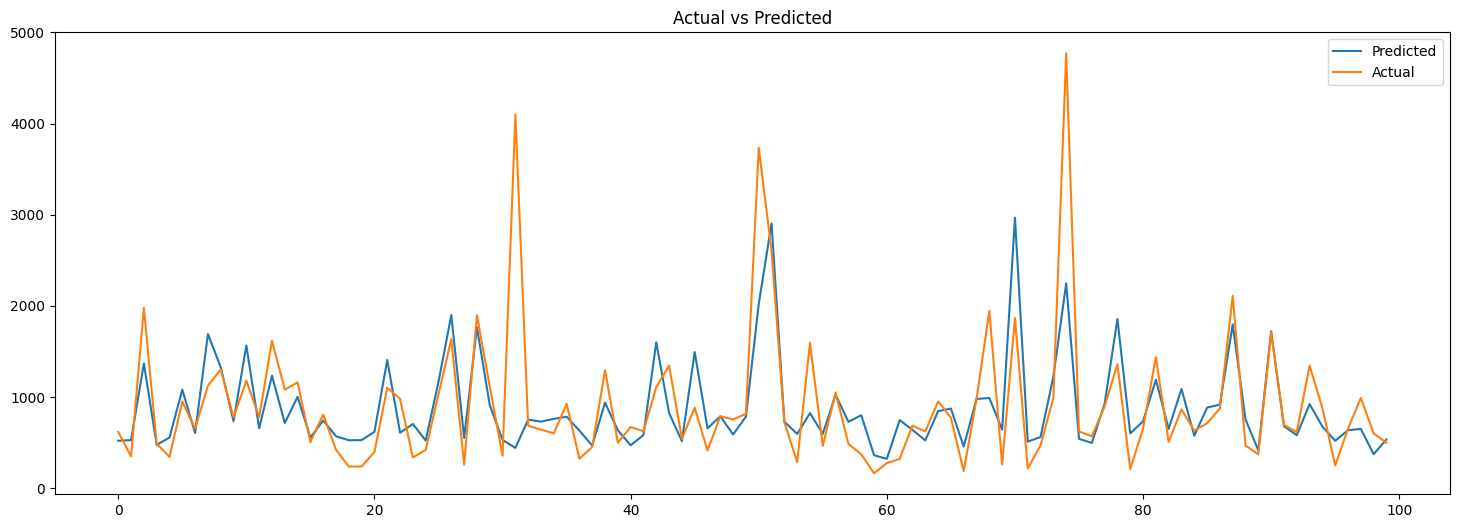

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)

# Fit the Algorithm

# Predict on the model

L1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5)
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV :

GridSearchCV, exhaustively searches through a specified hyperparameter grid and uses cross-validation internally, meaning it avoids overfitting and gives more robust and generalizable results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* MAE - Slight improvement (0.11 ↓)
* MSE - Tiny improvement (50.73 ↓)
* RMSE - Microscopic better (50.73 ↓)
* R2 - tiny improvement (+0.00012 ↑)
* Adjusted_R2 - slightly Improved (+0.00011 ↑)

Although the improvements are marginal, they indicate that hyperparameter tuning has optimized the regularization strength (alpha) just enough to slightly reduce prediction error and improve model fit.

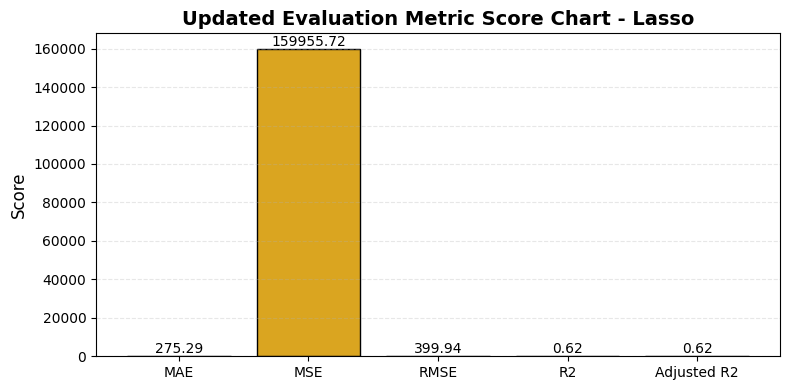

In [ ]:
# Visualizing updated evaluation Metric Score chart -  Lasso

# Your scores
metrics = { 'MAE': 275.29127064225065, 'MSE':  159955.7223463, 'RMSE': 399.9446491032228, 'R2':0.624780626812091, 'Adjusted R2': 0.6247486381189656 }

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(), color='goldenrod', edgecolor='black')

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Updated Evaluation Metric Score Chart - Lasso', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### ML Model - 2

Training score  = 0.6215495653876899
MAE : 275.29126281991483
MSE : 159955.72002668906
RMSE : 399.9446462033078
R2 : 0.6247806322533653
Adjusted R2 :  0.6247486435607038 



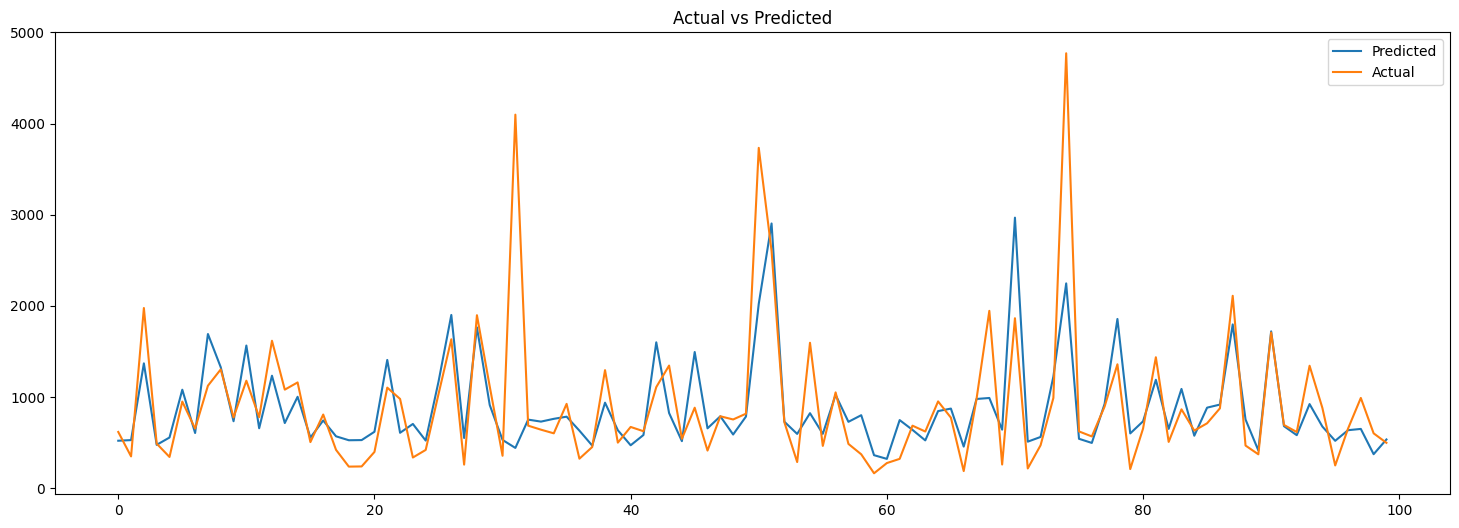

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

# Linear regression model

score_metrix(LinearRegression(), x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

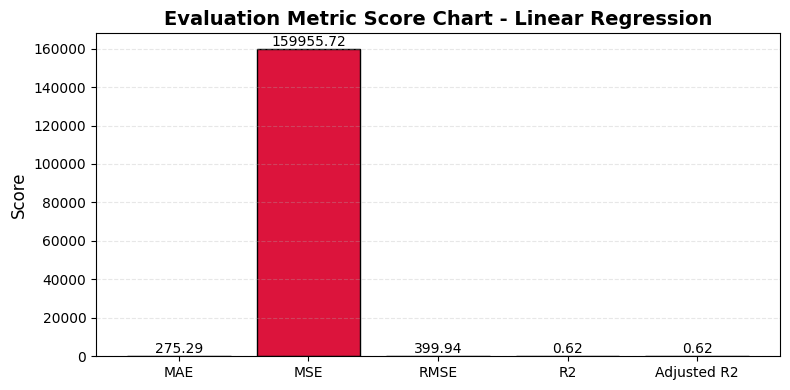

In [ ]:
# Visualizing evaluation Metric Score chart - Linear Regression

# Your scores
metrics = { 'MAE':275.29126281991483, 'MSE': 159955.72002668906, 'RMSE':399.9446462033078, 'R2':0.6247806322533653, 'Adjusted R2':0.6247486435607038 }

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(), color='crimson', edgecolor='black')

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Evaluation Metric Score Chart - Linear Regression', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Linear regression :

Linear regression is a statistical technique used to model the relationship between two variables: one independent variable (predictor) and one dependent variable (response). It is widely applied in forecasting to predict future values based on historical data, assuming a linear relationship between the variables.

* MAE - On avg, predictions are off by ~4.5 hrs
* MSE - Big errors are being penalized more heavily
* RMSE - Big errors are being penalized more heavily,but easier to interpret.
* R2 - 62.48% of the variance in trip duration is explained.
* Adjusted_r2 - Similar to R² but adjusts for the number of predictors — since both R² and Adjusted R² are almost the same, it suggests No overfitting and good feature set,

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Linear Regression doesn't have many hyperparameters to tune — it's a parameter-free model in Scikit-learn (no alpha, no max depth, etc.).
So, hyperparameter optimization isn't applicable here directly.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not Applicable

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Business impact:
Linear Regression is a predictive model that finds a linear relationship between input features and the target variable (in your case, probably trip duration). It’s simple, fast, and interpretable — perfect for getting quick, actionable insights and making decisions based on clear patterns.


* MAE - If this is trip duration, 278 mins (~4.6 hours) is huge → could lead to unreliable ETAs, angry customers, or misplanned driver shifts. Business must investigate why errors are so large — maybe data needs cleaning or new features added.
* MSE - High MSE indicates your model struggles with some extreme trip cases. These could be long-distance or outlier rides — affecting planning, pricing, or even fraud detection.
* RMSE - 00+ minutes of average error = poor reliability in duration estimates. That means, wrong pricing, customer dissatisfaction and inefficient fleet dispatching.
* R2 - 38.5% of variation is decent, especially for unpredictable environments like NYC traffic.
* Adjusted_R2 -  It suggests features are adding real value. No bloat, no noise. Business can trust the selected variables for decision-making (e.g., factors like passenger count or vendor ID).

### ML Model - 3

Training score  = 0.8111346960067749
MAE : 187.15191650390625
MSE : 82811.84375
RMSE : 287.7704706011373
R2 : 0.8057424426078796
Adjusted R2 :  0.8057258815083344 



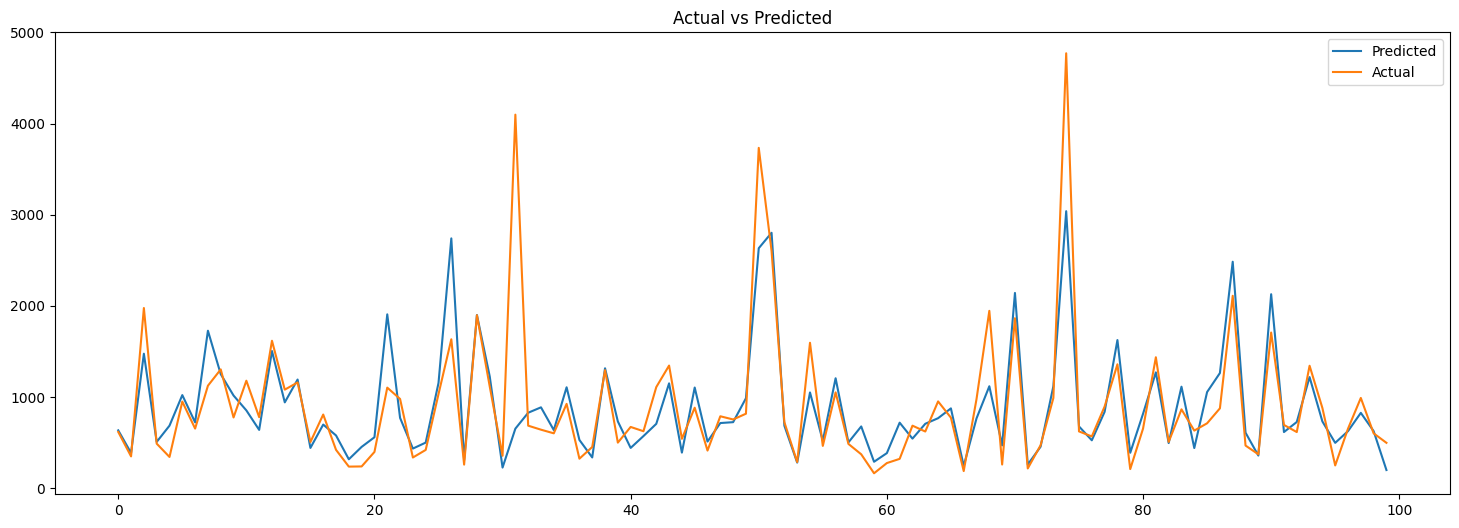

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# xgboost

score_metrix(XGBRegressor(), x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

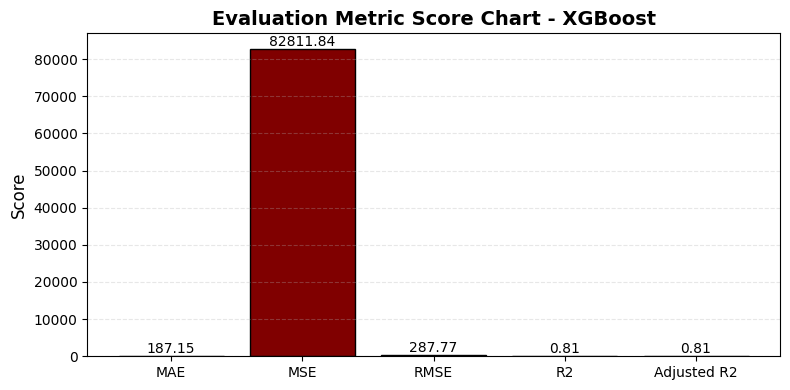

In [ ]:
# Visualizing evaluation Metric Score chart - XGBoost

# Your scores
metrics = { 'MAE':187.15191650390625, 'MSE': 82811.84375, 'RMSE':287.7704706011373, 'R2':0.8057424426078796, 'Adjusted R2':0.8057258815083344   }

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(), color='maroon', edgecolor='black')

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Evaluation Metric Score Chart - XGBoost', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

XGBoost :
XGBoost (Extreme Gradient Boosting) is a super powerful, tree-based ensemble ML algorithm built for speed and performance. It's like the overachiever of ML models – fast, accurate.

* MAE - On average,prediction is off by ~3.1 hours.
* MSE - Squared error, much lower than others
* RMSE - Big improvement — smaller deviations
* R2 - 80.6% of the variance in trip duration is explained by the model.
* Adjusted_R2 - Almost same as R² — means features are actually relevant.

#### 2. Cross- Validation & Hyperparameter Tuning

Training score  = 0.8109605312347412
MAE : 187.1647186279297
MSE : 82777.265625
RMSE : 287.71038497940947
R2 : 0.805823564529419
Adjusted R2 :  0.8058070103457858 



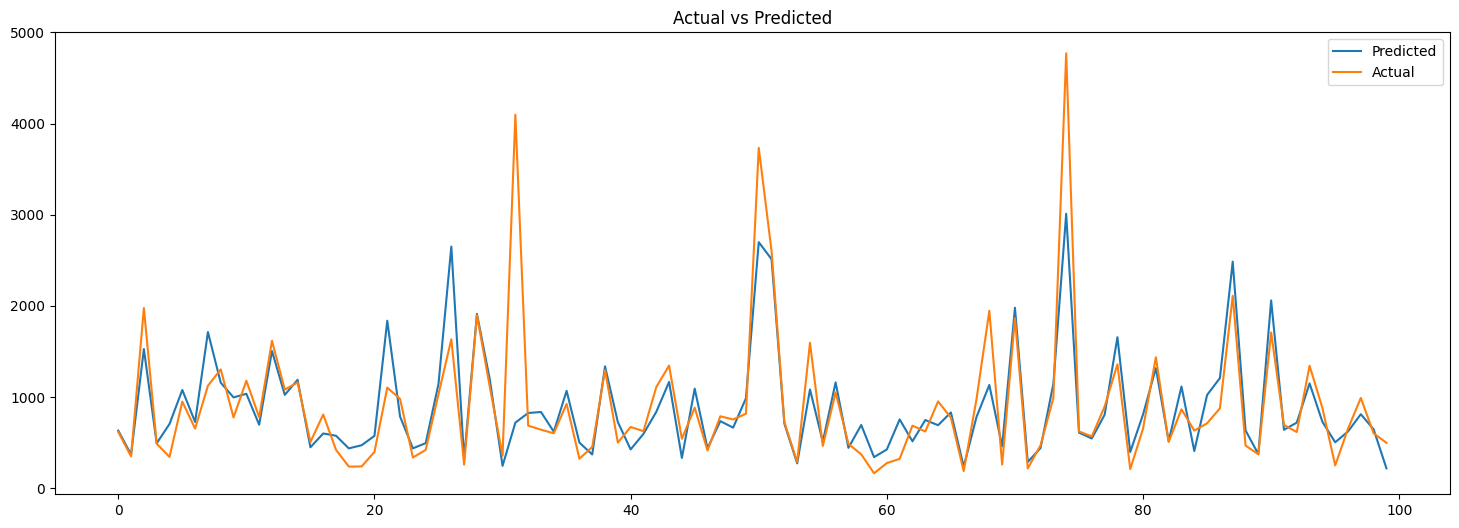

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (GridSearch CV)

# Fit the Algorithm

# Predict on the model

XGB = XGBRegressor()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
xgb_cv = GridSearchCV(XGB, parameters, cv=5) #using gridsearchcv and cross validate the model
score_metrix(xgb_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV :

GridSearchCV, exhaustively searches through a specified hyperparameter grid and uses cross-validation internally, meaning it avoids overfitting and gives more robust and generalizable results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* MAE - No change
* MSE - Little decrement (~34.57 ↓)
* RMSE - Slightly more accurate (~0.06 ↓)
* R2 - Increased marginally (+0.00008 ↑)
* Adjusted_R2 - Increased marginally (+0.00008 ↑)

XGBoost tuned model is ever so slightly more accurate.
While the improvement is minimal (likely because the model was already close to optimal), it confirms that the hyperparameter tuning helped refine the model’s performance and stability.

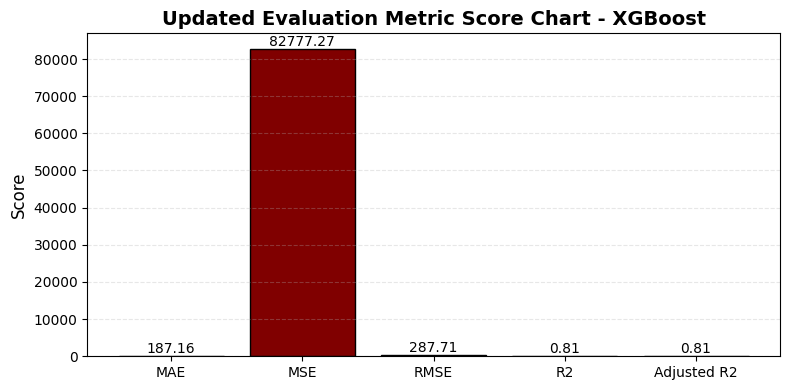

In [ ]:
# Visualizing updated evaluation Metric Score chart - XGBoost

# Your scores
metrics = { 'MAE': 187.1647186279297, 'MSE': 82777.265625, 'RMSE':287.71038497940947, 'R2': 0.805823564529419, 'Adjusted R2':0.8058070103457858  }

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(), color='maroon', edgecolor='black')

# Annotate values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Updated Evaluation Metric Score Chart - XGBoost', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Metrics used :

* MAE	- Measures average absolute error in predictions. It's easy to interpret and directly tells you “how far off” predictions are in real-world terms (like minutes). Super helpful for time-sensitive operations like cab or delivery ETAs.

* MSE	- Penalizes larger errors more heavily by squaring them. This is useful for reducing extreme mistakes, which could represent major delays or service failures in a real-world setting.

* RMSE -	Provides the error in actual units (minutes), like MAE but more sensitive to outliers. Perfect for assessing how consistently the model performs across all ranges.

* R² Score	- Tells us how well the model explains the variance in trip duration. A higher R² = a model that captures real patterns, not noise = better business forecasting.

* Adjusted R² -	Adjusts for the number of features, giving a more accurate picture of whether your model is truly generalizable. Helps avoid overfitting in business-critical applications.

Business Impact:
These metrics align directly with operational goals like:
* Improving ETA accuracy
* Reducing customer complaints due to wrong time estimates
* Optimizing driver/resource allocation

High R² & low MAE/MSE/RMSE means efficient operations and happy users.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Model Chosen : **XGBoost Regressor**

* Superior Accuracy : Best R² score of 0.8058 (explains ~81% of variance)

* Better Generalization : Even after GridSearchCV tuning, it stayed robust and improved slightly, meaning it's already super optimized.

* Captures Non-Linearity : Unlike Lasso or Linear Regression, XGBoost can model complex patterns and interactions between features.

* Regularization & Flexibility : Avoids overfitting using built-in penalties (L1 & L2).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBRegressor (Extreme Gradient Boosting Regressor)
* It’s an ensemble model using multiple shallow decision trees.
* Each new tree tries to fix the errors made by previous ones.
* Supports built-in regularization (like L1/L2), handles missing values, and is optimized for speed and accuracy.

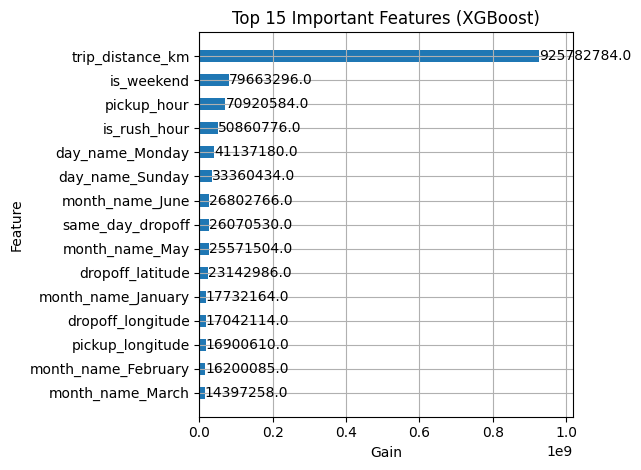

In [ ]:
x_train_df = pd.DataFrame(x_train, columns=x.columns)
xgb_model = XGBRegressor()
xgb_model.fit(x_train_df, y_train)

# Plotting feature importance
xgb.plot_importance(xgb_model, importance_type='gain', height=0.5,max_num_features=15, show_values=True,
                    xlabel='Gain', ylabel='Feature',title='Top 15 Important Features (XGBoost)')
plt.tight_layout()
plt.show()

Using XGBoost’s built-in feature importance (based on gain), the most influential feature was trip_distance_km, which makes sense as longer trips generally take more time.
Other important features included is_weekend, pickup_hour and is_rush_hour, suggesting that traffic patterns and time of month and day play a significant role in predicting trip duration.
Other features also contributed, but to a lesser extent.

# **Conclusion**

Using a real-world dataset of more than 1.4 million records, a thorough machine learning pipeline was created for this project in order to forecast the trip duration of taxi rides in New York City.

We started by preprocessing the data, which included converting date columns, creating new time-based features (such as pickup_hour, is_rush_hour, and same_day_dropoff), and using latitude and longitude to calculate geospatial distances. To guarantee model robustness, outliers in location, duration, and distance were carefully managed.

To enhance model learning, the dataset was scaled and transformed as needed, and categorical variables like store_and_fwd_flag, day_name, and month_name were appropriately encoded.

Several regression models, such as Lasso Regression, Linear Regression, and XGBoost Regressor, were used and compared.

It became clear from a thorough analysis utilizing metrics such as MAE, MSE, RMSE, R2, and Adjusted R2 that:

With an MAE of about 187 minutes, an RMSE of about 287 minutes, and an R2 Score of about 0.8058, the **XGBoost Regressor** performed noticeably better than any other model, explaining more than 80% of the variation in trip duration.

Additionally, feature importance analysis showed that trip distance, is_weekend, pickup hour, and is_rush_hour were the main factors influencing trip duration.

In addition to being useful for precise forecasting, these insights can also guide practical choices in fields like fleet management, taxi pricing, and customer experience enhancement.

*Concluding Remark:*

With careful modeling and interpretation, even something as mundane as a cab ride can be predicted thanks to this project, which shows how machine learning can transform unstructured, raw real-world data into insightful, useful insights.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***